In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Folder where the CSV files are stored
input_folder = '../../data/scalone_dane'

# Initialize an empty list to store all data
all_data = []

# Dictionary to hold each city's DataFrame
city_dataframes = {}

# Loop through each CSV file in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('_scalony.csv'):
        city = filename.replace('_scalony.csv', '')  # Extract city name
        file_path = os.path.join(input_folder, filename)
        
        # Read CSV and add a 'CITY' column
        df = pd.read_csv(file_path)
        df['CITY'] = city
        
        # Store individual city DataFrame in dictionary
        city_dataframes[city] = df.copy()
        
        # Add to the list for the combined DataFrame
        all_data.append(df)

# Combine all into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

print(f"Loaded data from {len(all_data)} cities. Total rows: {len(combined_df)}")


Loaded data from 12 cities. Total rows: 218047


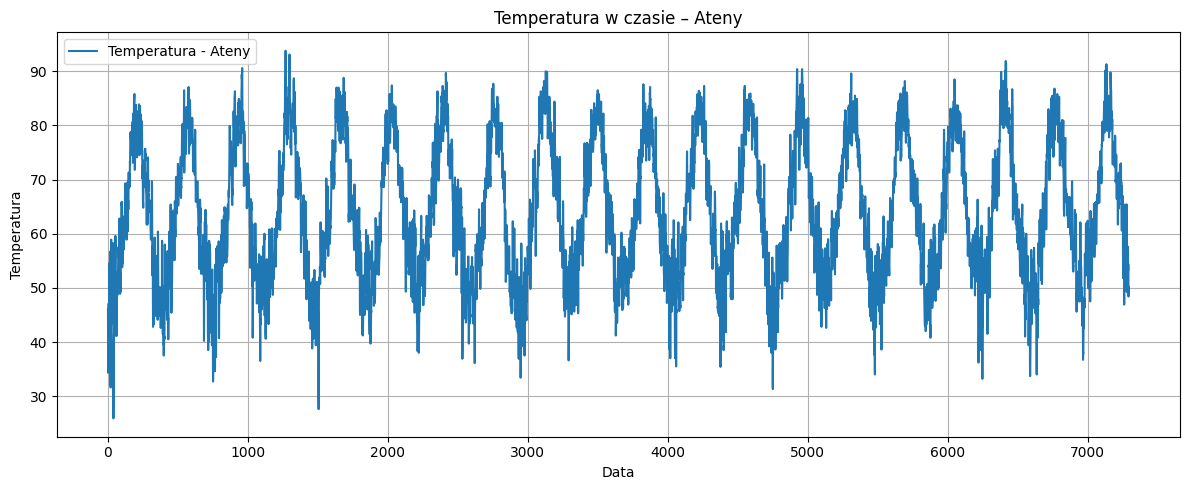

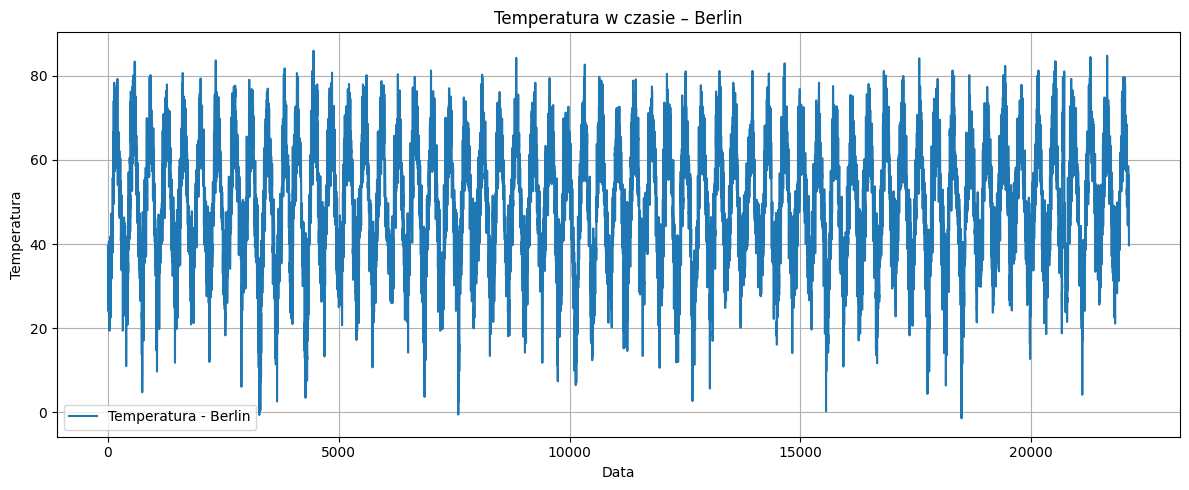

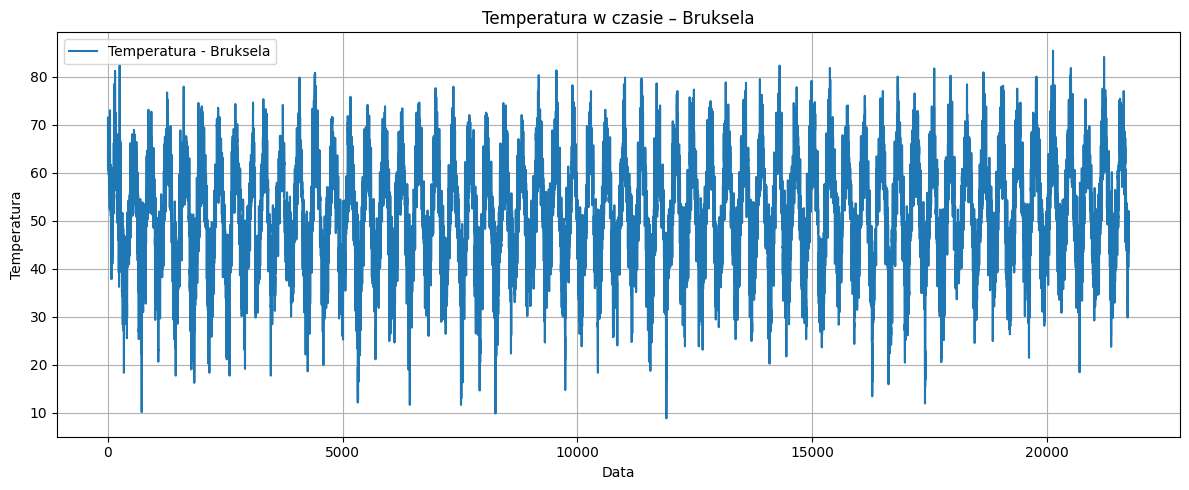

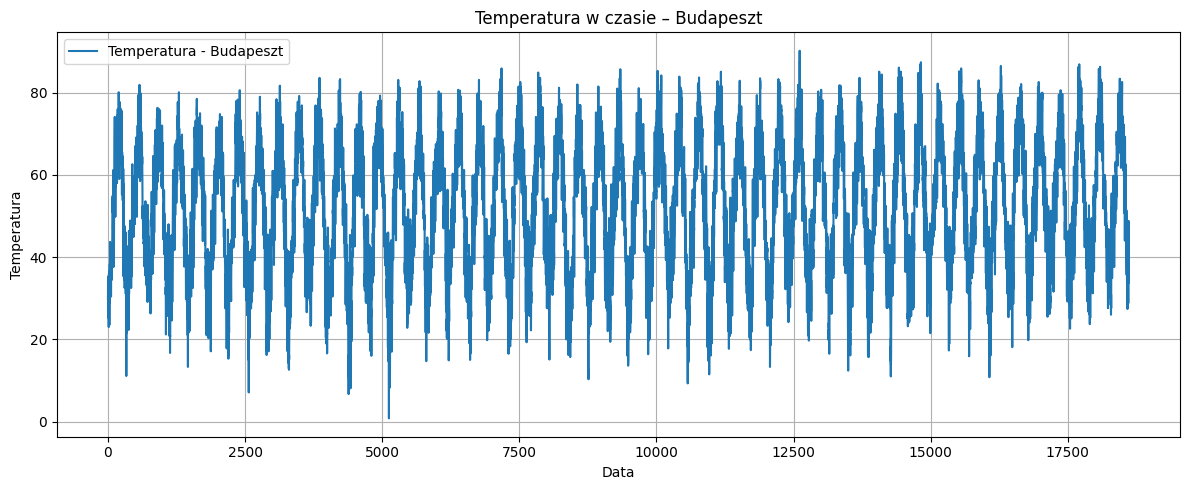

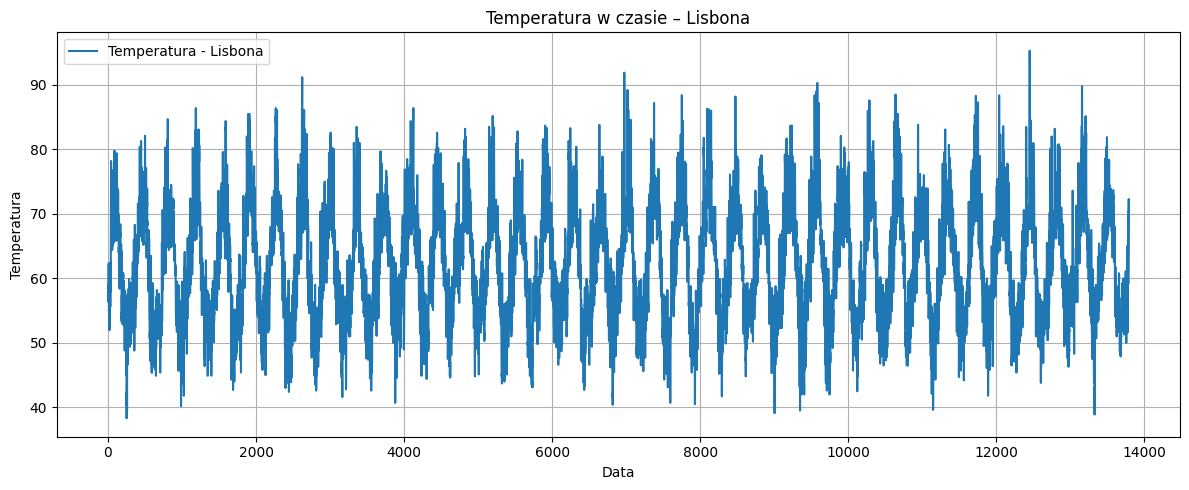

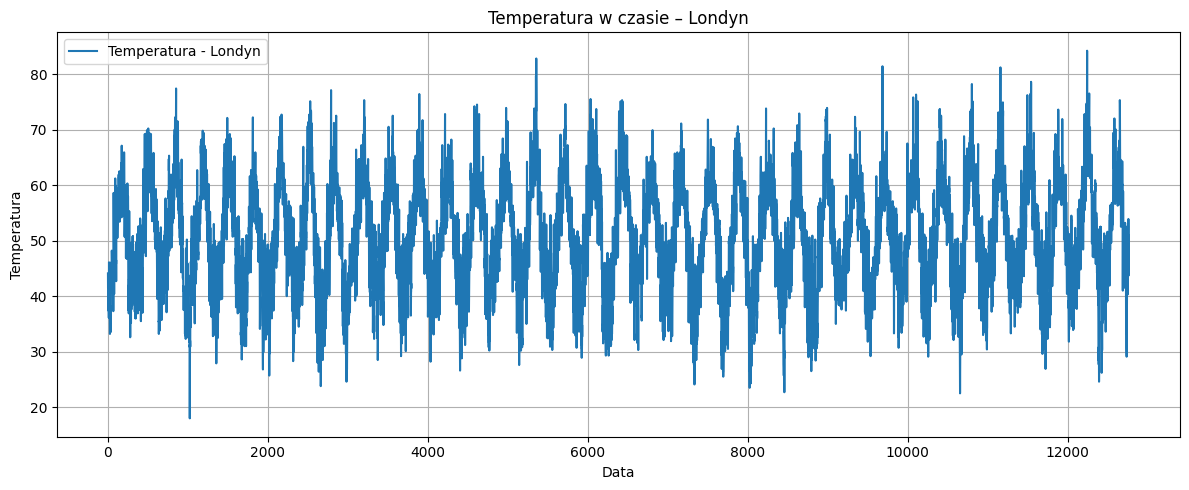

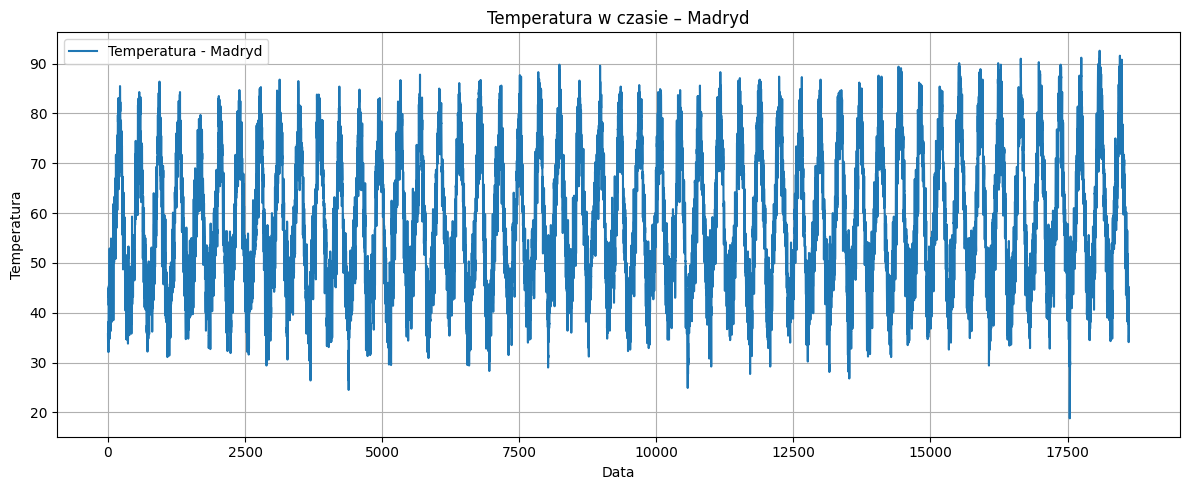

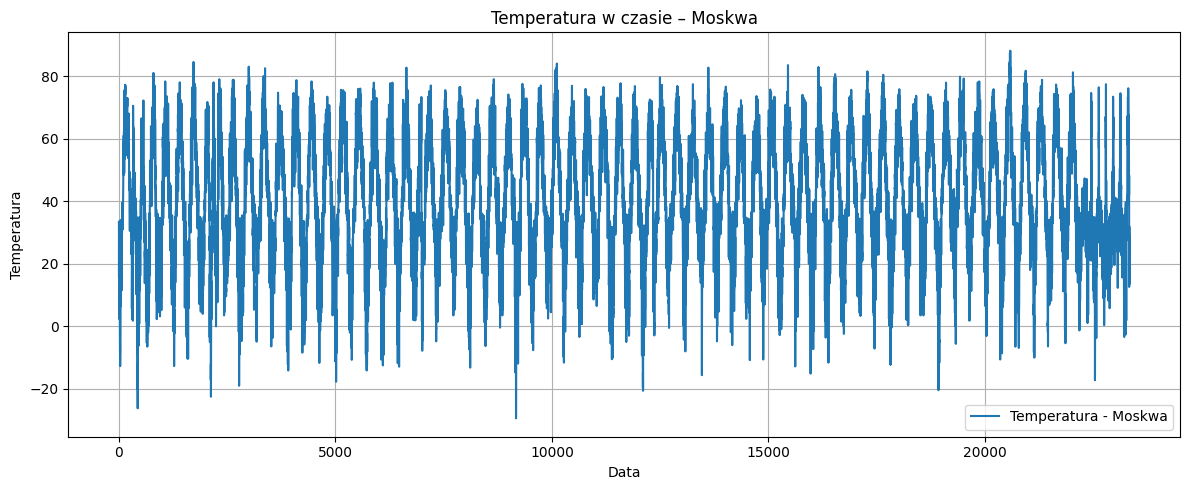

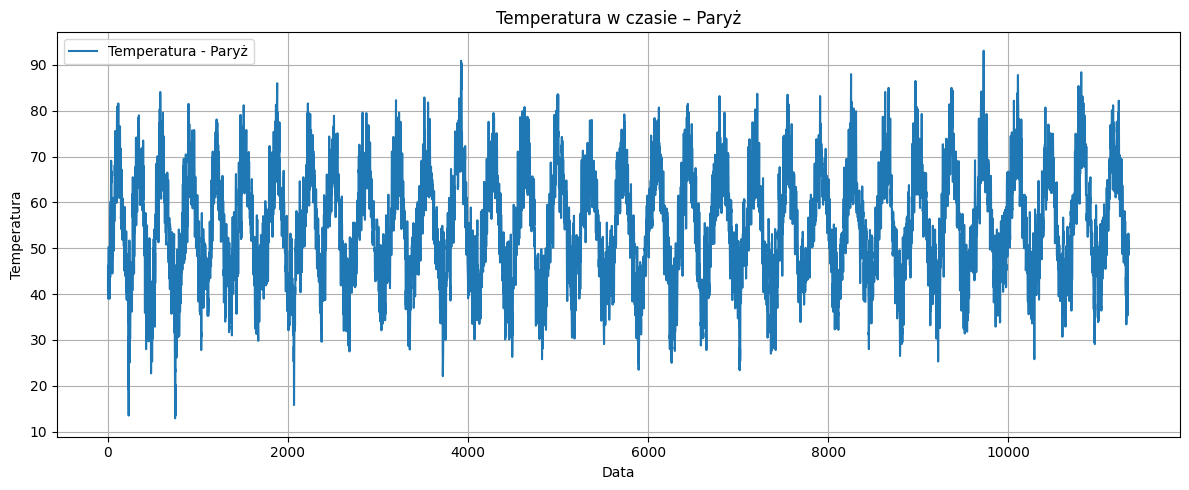

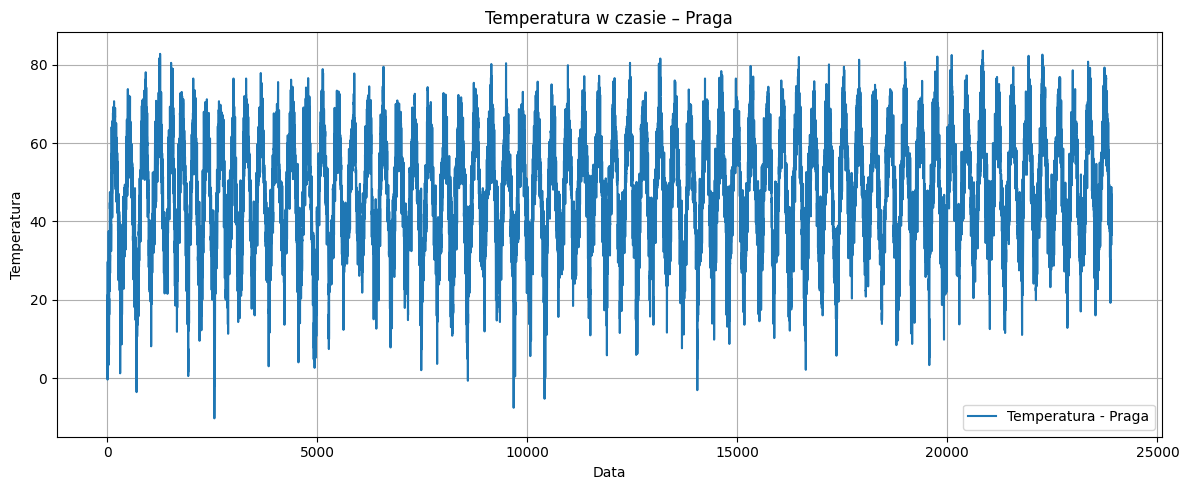

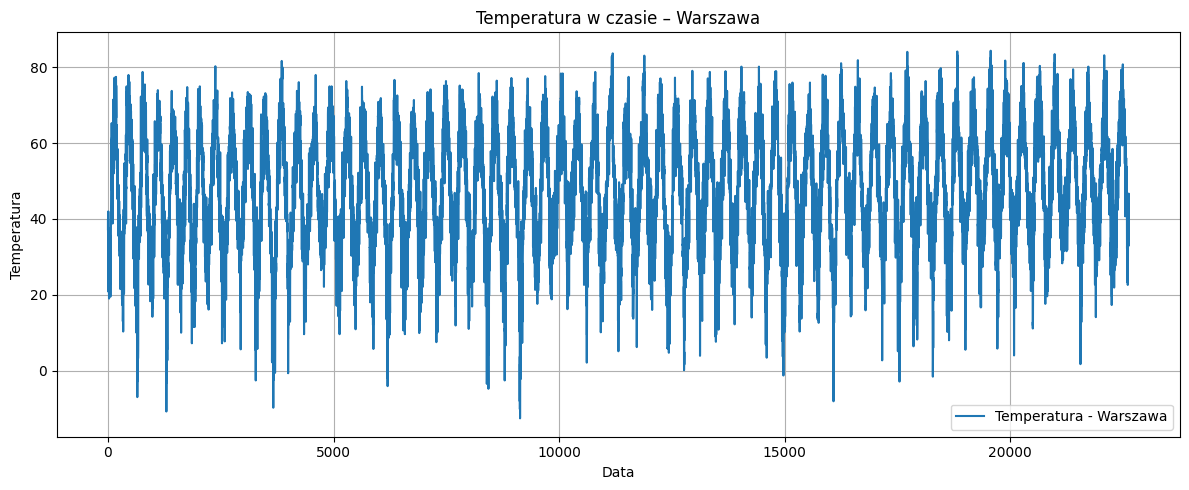

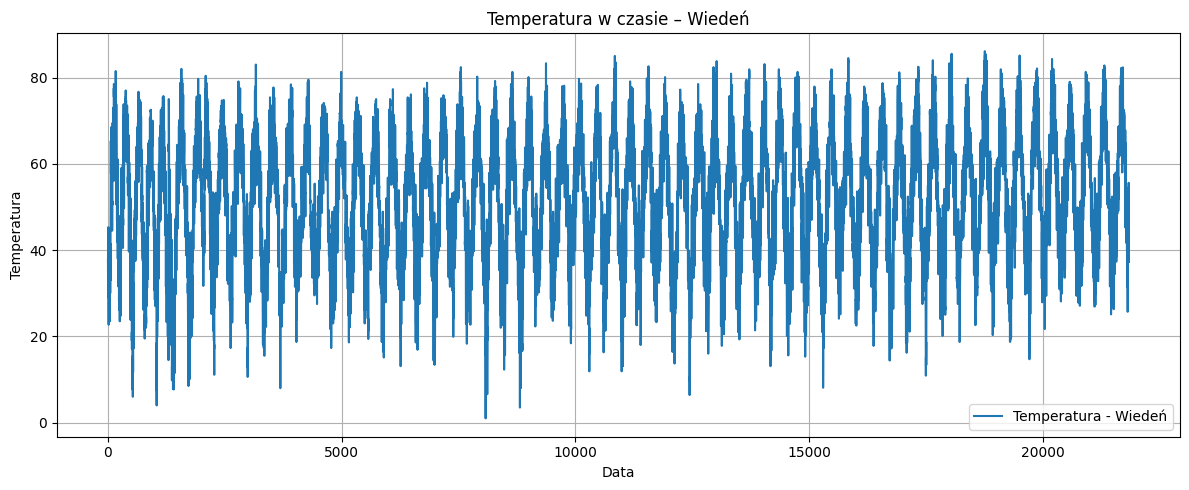

In [3]:
# Generate separate plots for each city
for city, df in city_dataframes.items():
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df['TEMP'], label=f'Temperatura - {city}')
    plt.title(f'Temperatura w czasie – {city}')
    plt.xlabel('Data')
    plt.ylabel('Temperatura')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Korelacje z TEMP:
TEMP      1.000000
MAX       0.977828
MIN       0.947702
DEWP      0.808331
Month     0.293717
MXSPD     0.145355
VISIB     0.144031
WDSP      0.103878
Year      0.044437
Day       0.009142
GUST     -0.076934
FRSHTT   -0.174427
PRCP     -0.323678
SLP            NaN
STP            NaN
SNDP           NaN
Name: TEMP, dtype: float64


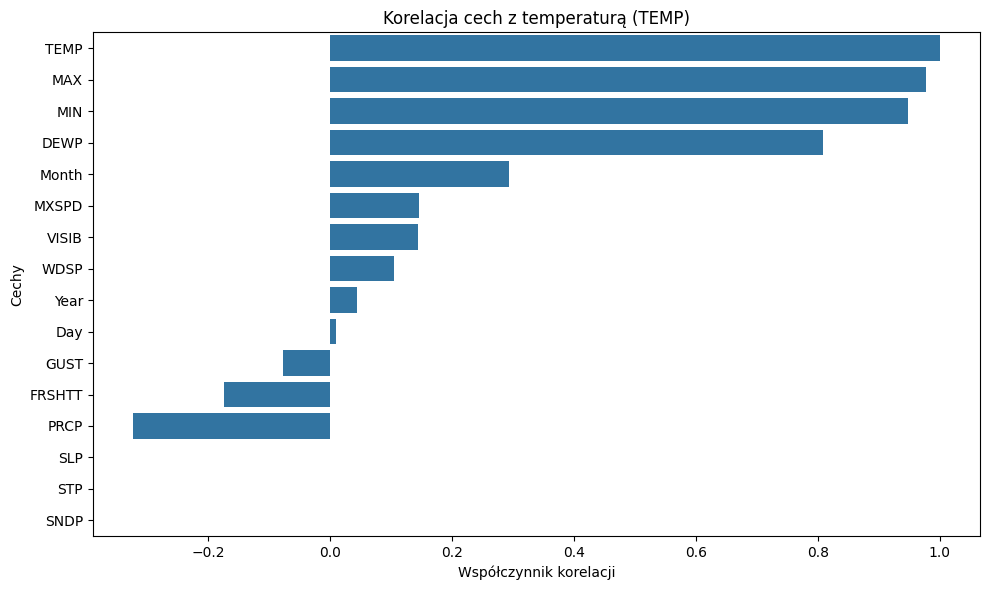

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Wczytanie danych
df = city_dataframes['Ateny'].copy()

# 2. Czyszczenie i przygotowanie
# Usunięcie kolumn typu "ATTRIBUTES", które są jakościowe i często puste
df = df[[col for col in df.columns if 'ATTRIBUTES' not in col]]

# Usunięcie kolumn niezmiennych lub zbędnych dla predykcji
df = df.drop(columns=['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'CITY'])

# Przekształcenie kolumny DATE do daty i dodanie cech czasowych
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day
df = df.drop(columns=['DATE'])

# Usunięcie wierszy z brakami danych
df = df.dropna()

# 3. Korelacja z celem (TEMP)
correlations = df.corr(numeric_only=True)['TEMP'].sort_values(ascending=False)

# Wyświetlenie korelacji
print("Korelacje z TEMP:")
print(correlations)

# Wykres korelacji
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Korelacja cech z temperaturą (TEMP)")
plt.xlabel("Współczynnik korelacji")
plt.ylabel("Cechy")
plt.tight_layout()
plt.show()


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Zakładamy, że df już nie zawiera TEMP
features = df.drop(columns=['TEMP']).copy()

# Dodaj stałą (bias term) potrzebną do obliczenia VIF
features_with_const = add_constant(features)

# Obliczanie VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(features_with_const.values, i)
                   for i in range(features_with_const.shape[1])]

print("\n📊 Współczynniki VIF (Variance Inflation Factor):")
print(vif_data.sort_values(by="VIF", ascending=False))



📊 Współczynniki VIF (Variance Inflation Factor):
   Feature        VIF
8      MIN  10.307664
7      MAX   8.578652
4     WDSP   8.184609
5    MXSPD   6.237028
0     DEWP   4.311201
6     GUST   1.815506
9     PRCP   1.637067
11  FRSHTT   1.269011
13   Month   1.189234
3    VISIB   1.039370
12    Year   1.019603
14     Day   1.001919
10    SNDP   0.000026
2      STP   0.000006
1      SLP   0.000000


C:\Users\mikos\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [6]:
selected_features = ['DEWP', 'Month', 'PRCP', 'VISIB']

In [7]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import pandas as pd
from itertools import product
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

In [8]:

warnings.filterwarnings("ignore")


In [9]:
results_summary = []


# Parametry
exog_vars = ['DEWP', 'Month', 'PRCP', 'VISIB']
forecast_horizon = 1
test_size_ratio = 0.10
validation_size_ratio = 0.15
last_n_years = 2

Ateny model selection:   0%|                                                                    | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Ateny model selection:   4%|██▏                                                         | 1/27 [00:00<00:07,  3.43it/s]

1
Order: (0, 0, 0), AICc: 4396.07, ADF p-value: 0.0241, Best_Order: (0, 0, 0), Best_aicc: 4396.07
(0, 0, 1)
2


Ateny model selection:   7%|████▍                                                       | 2/27 [00:00<00:08,  2.90it/s]

1
Order: (0, 0, 1), AICc: 3953.59, ADF p-value: 0.0857, Best_Order: (0, 0, 0), Best_aicc: 4396.07
(0, 0, 2)
2


Ateny model selection:  11%|██████▋                                                     | 3/27 [00:01<00:09,  2.57it/s]

1
Order: (0, 0, 2), AICc: 3728.44, ADF p-value: 0.2754, Best_Order: (0, 0, 0), Best_aicc: 4396.07
(0, 1, 0)
2


Ateny model selection:  15%|████████▉                                                   | 4/27 [00:01<00:08,  2.84it/s]

1
Order: (0, 1, 0), AICc: 3105.77, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3105.77
(0, 1, 1)
2


Ateny model selection:  19%|███████████                                                 | 5/27 [00:01<00:07,  3.04it/s]

1
Order: (0, 1, 1), AICc: 3102.88, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3102.88
(0, 1, 2)
2


Ateny model selection:  22%|█████████████▎                                              | 6/27 [00:02<00:07,  2.84it/s]

1
Order: (0, 1, 2), AICc: 3086.43, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(0, 2, 0)
2


Ateny model selection:  26%|███████████████▌                                            | 7/27 [00:02<00:06,  3.01it/s]

1
Order: (0, 2, 0), AICc: 3554.22, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(0, 2, 1)
2


Ateny model selection:  30%|█████████████████▊                                          | 8/27 [00:02<00:07,  2.63it/s]

1
Order: (0, 2, 1), AICc: 3104.95, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(0, 2, 2)
2


Ateny model selection:  33%|████████████████████                                        | 9/27 [00:03<00:07,  2.30it/s]

1
Order: (0, 2, 2), AICc: 3103.72, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(1, 0, 0)
2


Ateny model selection:  37%|█████████████████████▊                                     | 10/27 [00:03<00:07,  2.40it/s]

1
Order: (1, 0, 0), AICc: 3112.79, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(1, 0, 1)
2


Ateny model selection:  41%|████████████████████████                                   | 11/27 [00:04<00:06,  2.29it/s]

1
Order: (1, 0, 1), AICc: 3109.69, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(1, 0, 2)
2


Ateny model selection:  44%|██████████████████████████▏                                | 12/27 [00:04<00:07,  2.08it/s]

1
Order: (1, 0, 2), AICc: 3092.68, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(1, 1, 0)
2


Ateny model selection:  48%|████████████████████████████▍                              | 13/27 [00:05<00:05,  2.45it/s]

1
Order: (1, 1, 0), AICc: 3107.56, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3086.43
(1, 1, 1)
2


Ateny model selection:  52%|██████████████████████████████▌                            | 14/27 [00:05<00:05,  2.55it/s]

1
Order: (1, 1, 1), AICc: 3074.64, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 3074.64
(1, 1, 2)
2


Ateny model selection:  56%|████████████████████████████████▊                          | 15/27 [00:05<00:04,  2.49it/s]

1
Order: (1, 1, 2), AICc: 3065.88, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(1, 2, 0)
2


Ateny model selection:  59%|██████████████████████████████████▉                        | 16/27 [00:06<00:03,  2.87it/s]

1
Order: (1, 2, 0), AICc: 3416.84, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(1, 2, 1)
2


Ateny model selection:  63%|█████████████████████████████████████▏                     | 17/27 [00:06<00:04,  2.43it/s]

1
Order: (1, 2, 1), AICc: 3106.91, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(1, 2, 2)
2


Ateny model selection:  67%|███████████████████████████████████████▎                   | 18/27 [00:07<00:04,  2.09it/s]

1
Order: (1, 2, 2), AICc: 3104.79, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 0, 0)
2


Ateny model selection:  70%|█████████████████████████████████████████▌                 | 19/27 [00:07<00:03,  2.10it/s]

1
Order: (2, 0, 0), AICc: 3109.98, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 0, 1)
2


Ateny model selection:  74%|███████████████████████████████████████████▋               | 20/27 [00:08<00:03,  1.75it/s]

1
Order: (2, 0, 1), AICc: 3114.78, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 0, 2)
2


Ateny model selection:  78%|█████████████████████████████████████████████▉             | 21/27 [00:09<00:03,  1.63it/s]

1
Order: (2, 0, 2), AICc: 3074.17, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 1, 0)
2


Ateny model selection:  81%|████████████████████████████████████████████████           | 22/27 [00:09<00:02,  1.94it/s]

1
Order: (2, 1, 0), AICc: 3095.69, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 1, 1)
2


Ateny model selection:  85%|██████████████████████████████████████████████████▎        | 23/27 [00:09<00:01,  2.04it/s]

1
Order: (2, 1, 1), AICc: 3070.17, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 1, 2)
2


Ateny model selection:  89%|████████████████████████████████████████████████████▍      | 24/27 [00:10<00:01,  1.90it/s]

1
Order: (2, 1, 2), AICc: 3067.51, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 2, 0)
2


Ateny model selection:  93%|██████████████████████████████████████████████████████▋    | 25/27 [00:10<00:00,  2.22it/s]

1
Order: (2, 2, 0), AICc: 3340.22, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 2, 1)
2


Ateny model selection:  96%|████████████████████████████████████████████████████████▊  | 26/27 [00:11<00:00,  2.02it/s]

1
Order: (2, 2, 1), AICc: 3100.73, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88
(2, 2, 2)
2


Ateny model selection: 100%|███████████████████████████████████████████████████████████| 27/27 [00:12<00:00,  2.21it/s]


1
Order: (2, 2, 2), AICc: 3101.37, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3065.88


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:30,  2.32it/s]

67.30751577723834
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:34,  2.06it/s]

67.58020612561286
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:01<00:34,  2.04it/s]

68.31755407971727
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:35,  1.96it/s]

67.71570252700727
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:02<00:37,  1.82it/s]

66.17883403048066
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:02<00:32,  2.06it/s]

68.48956912067754
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:03<00:33,  1.99it/s]

68.80234455582575
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:03<00:32,  2.03it/s]

68.38275482900781
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:04<00:32,  1.94it/s]

67.81336824804666
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:05<00:31,  1.98it/s]

68.25288479270066
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:05<00:29,  2.08it/s]

67.56452565233826
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:05<00:28,  2.15it/s]

67.30627584721718
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:06<00:26,  2.25it/s]

67.67133095384028
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:06<00:24,  2.36it/s]

65.78528705259637
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:07<00:23,  2.44it/s]

67.96213960281582
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:07<00:23,  2.47it/s]

67.27325770808953
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:07<00:22,  2.50it/s]

65.82157259668278
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:08<00:21,  2.55it/s]

66.34243611646295
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:08<00:21,  2.53it/s]

66.40037772512548
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:09<00:22,  2.38it/s]

66.83440847601885
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:09<00:22,  2.28it/s]

66.08218886529023
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:10<00:22,  2.24it/s]

64.63174805072623
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:10<00:22,  2.22it/s]

66.97916023130715
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:11<00:24,  1.99it/s]

65.04060288208066
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:11<00:22,  2.13it/s]

65.00529121228288
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:11<00:20,  2.27it/s]

65.70606836510586
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:12<00:20,  2.28it/s]

66.54517953294632
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:12<00:19,  2.37it/s]

64.86704240371732
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:13<00:18,  2.39it/s]

65.64823530677515
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:13<00:17,  2.42it/s]

62.08961238283027
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:13<00:17,  2.46it/s]

58.53074044059675
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:14<00:17,  2.29it/s]

61.77122689343072
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:14<00:17,  2.33it/s]

64.75093615990308
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:15<00:16,  2.38it/s]

65.70699137334591
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:15<00:15,  2.39it/s]

65.99137159058182
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:16<00:16,  2.27it/s]

66.48732654673779
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:16<00:15,  2.40it/s]

63.64802993558176
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:16<00:14,  2.44it/s]

58.53051394074206
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:17<00:14,  2.42it/s]

58.9645033430087
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:17<00:13,  2.37it/s]

63.67447423538126
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:18<00:13,  2.35it/s]

64.94752309384153
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:18<00:13,  2.33it/s]

63.96979628708432
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:18<00:12,  2.46it/s]

65.26176497183258
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:19<00:12,  2.25it/s]

67.40231219649549
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:20<00:13,  2.08it/s]

67.69178859070107
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:20<00:13,  1.96it/s]

64.71074593261602
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:21<00:15,  1.72it/s]

63.985032008282914
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:21<00:14,  1.75it/s]

63.519544848370714
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:22<00:14,  1.67it/s]

63.699805639191375
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:23<00:12,  1.82it/s]

61.7034416570571
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:23<00:11,  1.98it/s]

61.147674854925796
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:23<00:10,  2.06it/s]

61.81305471519303
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:24<00:09,  2.17it/s]

63.49743644566179
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:24<00:08,  2.16it/s]

63.584195487951185
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:25<00:08,  2.02it/s]

64.62593132939047
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:25<00:08,  1.92it/s]

67.14326687269809
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:26<00:08,  1.86it/s]

66.1242458767255
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:26<00:07,  2.04it/s]

63.114988492319
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:27<00:06,  2.17it/s]

61.7034598620619
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:27<00:05,  2.25it/s]

60.198793806645995
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:28<00:05,  2.37it/s]

61.24019609502166
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:28<00:04,  2.38it/s]

62.075689595452886
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:28<00:04,  2.46it/s]

62.94374699365771
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:29<00:03,  2.34it/s]

63.58416893219419
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:29<00:03,  2.30it/s]

62.195130834805695
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:30<00:03,  1.96it/s]

63.96029180606662
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:30<00:02,  2.18it/s]

63.67101684214818
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:31<00:02,  2.35it/s]

64.56797200836436
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:31<00:01,  2.44it/s]

63.98924072967211
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:31<00:01,  2.39it/s]

63.15006552029184
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:32<00:00,  2.47it/s]

63.3526093949729
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:32<00:00,  2.43it/s]

63.728780803865625
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:33<00:00,  2.20it/s]

63.69984444235352
False
False


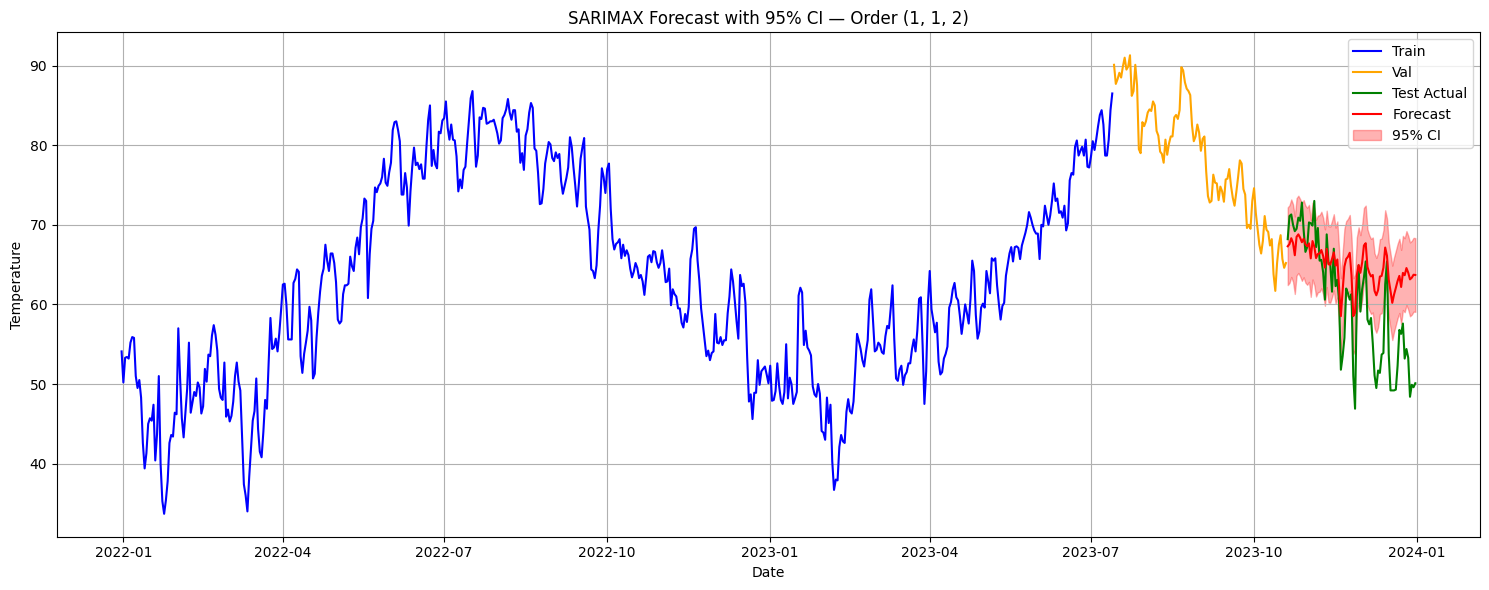

Berlin model selection:   0%|                                                                   | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Berlin model selection:   4%|██▏                                                        | 1/27 [00:00<00:06,  4.17it/s]

1
Order: (0, 0, 0), AICc: 4056.35, ADF p-value: 0.0117, Best_Order: (0, 0, 0), Best_aicc: 4056.35
(0, 0, 1)
2


Berlin model selection:   7%|████▎                                                      | 2/27 [00:00<00:06,  3.60it/s]

1
Order: (0, 0, 1), AICc: 3825.78, ADF p-value: 0.0136, Best_Order: (0, 0, 1), Best_aicc: 3825.78
(0, 0, 2)
2


Berlin model selection:  11%|██████▌                                                    | 3/27 [00:00<00:08,  2.89it/s]

1
Order: (0, 0, 2), AICc: 3740.32, ADF p-value: 0.0000, Best_Order: (0, 0, 2), Best_aicc: 3740.32
(0, 1, 0)
2


Berlin model selection:  19%|██████████▉                                                | 5/27 [00:01<00:05,  4.00it/s]

1
Order: (0, 1, 0), AICc: 3460.40, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3460.40
(0, 1, 1)
2
1
Order: (0, 1, 1), AICc: 3435.67, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3435.67
(0, 1, 2)
2


Berlin model selection:  22%|█████████████                                              | 6/27 [00:01<00:05,  3.62it/s]

1
Order: (0, 1, 2), AICc: 3401.93, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(0, 2, 0)
2


Berlin model selection:  26%|███████████████▎                                           | 7/27 [00:01<00:05,  3.88it/s]

1
Order: (0, 2, 0), AICc: 3956.69, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(0, 2, 1)
2


Berlin model selection:  30%|█████████████████▍                                         | 8/27 [00:02<00:05,  3.59it/s]

1
Order: (0, 2, 1), AICc: 3453.62, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(0, 2, 2)
2


Berlin model selection:  33%|███████████████████▋                                       | 9/27 [00:02<00:05,  3.13it/s]

1
Order: (0, 2, 2), AICc: 3438.31, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(1, 0, 0)
2


Berlin model selection:  37%|█████████████████████▍                                    | 10/27 [00:03<00:05,  2.95it/s]

1
Order: (1, 0, 0), AICc: 3467.10, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(1, 0, 1)
2


Berlin model selection:  41%|███████████████████████▋                                  | 11/27 [00:03<00:06,  2.42it/s]

1
Order: (1, 0, 1), AICc: 3445.58, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(1, 0, 2)
2


Berlin model selection:  44%|█████████████████████████▊                                | 12/27 [00:04<00:06,  2.18it/s]

1
Order: (1, 0, 2), AICc: 3408.12, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3451.88, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3401.93


Berlin model selection:  48%|███████████████████████████▉                              | 13/27 [00:04<00:05,  2.67it/s]

(1, 1, 1)
2


Berlin model selection:  52%|██████████████████████████████                            | 14/27 [00:04<00:05,  2.54it/s]

1
Order: (1, 1, 1), AICc: 3386.02, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 3386.02
(1, 1, 2)
2


Berlin model selection:  56%|████████████████████████████████▏                         | 15/27 [00:05<00:06,  1.93it/s]

1
Order: (1, 1, 2), AICc: 3385.17, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(1, 2, 0)
2
1


Berlin model selection:  59%|██████████████████████████████████▎                       | 16/27 [00:05<00:04,  2.36it/s]

Order: (1, 2, 0), AICc: 3809.70, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(1, 2, 1)
2


Berlin model selection:  63%|████████████████████████████████████▌                     | 17/27 [00:06<00:04,  2.28it/s]

1
Order: (1, 2, 1), AICc: 3450.29, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(1, 2, 2)
2


Berlin model selection:  67%|██████████████████████████████████████▋                   | 18/27 [00:06<00:04,  2.19it/s]

1
Order: (1, 2, 2), AICc: 3454.00, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(2, 0, 0)
2


Berlin model selection:  70%|████████████████████████████████████████▊                 | 19/27 [00:07<00:03,  2.17it/s]

1
Order: (2, 0, 0), AICc: 3452.01, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(2, 0, 1)
2


Berlin model selection:  74%|██████████████████████████████████████████▉               | 20/27 [00:07<00:03,  2.08it/s]

1
Order: (2, 0, 1), AICc: 3403.47, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(2, 0, 2)
2


Berlin model selection:  78%|█████████████████████████████████████████████             | 21/27 [00:08<00:03,  1.88it/s]

1
Order: (2, 0, 2), AICc: 3411.14, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(2, 1, 0)
2


Berlin model selection:  81%|███████████████████████████████████████████████▎          | 22/27 [00:08<00:02,  2.29it/s]

1
Order: (2, 1, 0), AICc: 3420.92, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(2, 1, 1)
2


Berlin model selection:  85%|█████████████████████████████████████████████████▍        | 23/27 [00:09<00:02,  1.96it/s]

1
Order: (2, 1, 1), AICc: 3388.06, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3385.17
(2, 1, 2)
2


Berlin model selection:  89%|███████████████████████████████████████████████████▌      | 24/27 [00:09<00:01,  1.83it/s]

1
Order: (2, 1, 2), AICc: 3382.95, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3382.95
(2, 2, 0)
2


Berlin model selection:  93%|█████████████████████████████████████████████████████▋    | 25/27 [00:10<00:00,  2.14it/s]

1
Order: (2, 2, 0), AICc: 3686.34, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3382.95
(2, 2, 1)
2


Berlin model selection:  96%|███████████████████████████████████████████████████████▊  | 26/27 [00:10<00:00,  1.97it/s]

1
Order: (2, 2, 1), AICc: 3425.25, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3382.95
(2, 2, 2)
2


Berlin model selection: 100%|██████████████████████████████████████████████████████████| 27/27 [00:11<00:00,  2.34it/s]


1
Order: (2, 2, 2), AICc: 3428.10, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3382.95


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:43,  1.66it/s]

65.62735425396713
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:01<00:44,  1.60it/s]

66.04596746761403
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:01<00:43,  1.62it/s]

65.02259031015114
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:02<00:43,  1.60it/s]

65.33075436543933
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:03<00:42,  1.61it/s]

64.47700727681377
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:03<00:41,  1.62it/s]

65.82138840866403
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:04<00:41,  1.61it/s]

66.46641576242206
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:05<00:41,  1.56it/s]

67.96672518526083
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:05<00:40,  1.57it/s]

69.88989595777457
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:06<00:41,  1.53it/s]

68.3472613486198
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:07<00:40,  1.53it/s]

67.7661932727435
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:07<00:39,  1.54it/s]

64.7563071452109
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:08<00:39,  1.51it/s]

62.94145806156641
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:08<00:38,  1.52it/s]

65.66149156443565
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:09<00:37,  1.55it/s]

68.77876169382836
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:10<00:36,  1.57it/s]

67.273077266864
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:10<00:34,  1.60it/s]

65.79678817674902
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:11<00:34,  1.58it/s]

66.60840385878116
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:12<00:33,  1.60it/s]

70.09252839135985
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:12<00:33,  1.57it/s]

68.6417865579439
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:13<00:33,  1.55it/s]

66.0293951618142
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:14<00:33,  1.54it/s]

66.12845971629608
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:14<00:33,  1.51it/s]

67.04397706568977
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:15<00:32,  1.52it/s]

68.88766979844186
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:16<00:31,  1.55it/s]

65.48812996777579
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:16<00:30,  1.53it/s]

59.38658488836716
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:17<00:29,  1.56it/s]

61.424966951148505
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:17<00:28,  1.56it/s]

59.049593046501954
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:18<00:28,  1.56it/s]

57.63779152933907
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:19<00:26,  1.60it/s]

56.29560924655715
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:19<00:26,  1.58it/s]

60.55365144137927
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:20<00:26,  1.57it/s]

61.337528607639186
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:21<00:25,  1.58it/s]

60.80728420064129
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:21<00:24,  1.60it/s]

62.42423941010057
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:22<00:24,  1.57it/s]

62.901868751111536
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:23<00:23,  1.56it/s]

64.35923859683317
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:23<00:23,  1.52it/s]

62.72782336724349
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:24<00:22,  1.52it/s]

62.43468893508983
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:24<00:22,  1.54it/s]

63.58430169042256
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:25<00:21,  1.54it/s]

63.99906412550196
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:26<00:20,  1.56it/s]

62.80938804851184
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:26<00:20,  1.54it/s]

61.44899481253
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:27<00:19,  1.54it/s]

62.12163191455666
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:28<00:18,  1.53it/s]

63.19348301085421
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:28<00:18,  1.48it/s]

60.07348982268695
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:29<00:18,  1.48it/s]

57.763549191315846
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:30<00:17,  1.48it/s]

56.96433315579284
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:31<00:17,  1.45it/s]

59.54990980205554
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:31<00:16,  1.49it/s]

63.75640113170583
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:32<00:15,  1.50it/s]

65.02923975434707
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:33<00:14,  1.49it/s]

63.97926027850823
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:33<00:13,  1.50it/s]

64.03154517202826
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:34<00:13,  1.48it/s]

62.63677859792348
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:35<00:12,  1.47it/s]

65.14138419155714
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:35<00:12,  1.47it/s]

64.74996202272379
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:36<00:11,  1.49it/s]

64.58331309753723
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:37<00:10,  1.50it/s]

65.20096144367982
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:37<00:10,  1.47it/s]

63.4112012029537
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:38<00:09,  1.49it/s]

62.65985004200465
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:39<00:08,  1.50it/s]

59.24749887862634
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:39<00:07,  1.50it/s]

60.37201590819814
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:40<00:07,  1.48it/s]

61.831829502808965
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:41<00:06,  1.47it/s]

61.0264464323552
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:41<00:06,  1.47it/s]

63.80868571080629
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:42<00:05,  1.48it/s]

61.42898736417973
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:43<00:04,  1.47it/s]

59.73733562547491
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:43<00:04,  1.49it/s]

56.39526596975725
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:44<00:03,  1.49it/s]

61.442864739674874
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:45<00:02,  1.47it/s]

59.17066250521117
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:45<00:02,  1.46it/s]

62.03589437080747
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:46<00:01,  1.46it/s]

58.25804156264113
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:47<00:00,  1.43it/s]

58.189705758911245
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:48<00:00,  1.52it/s]

56.115361560734065
False
False


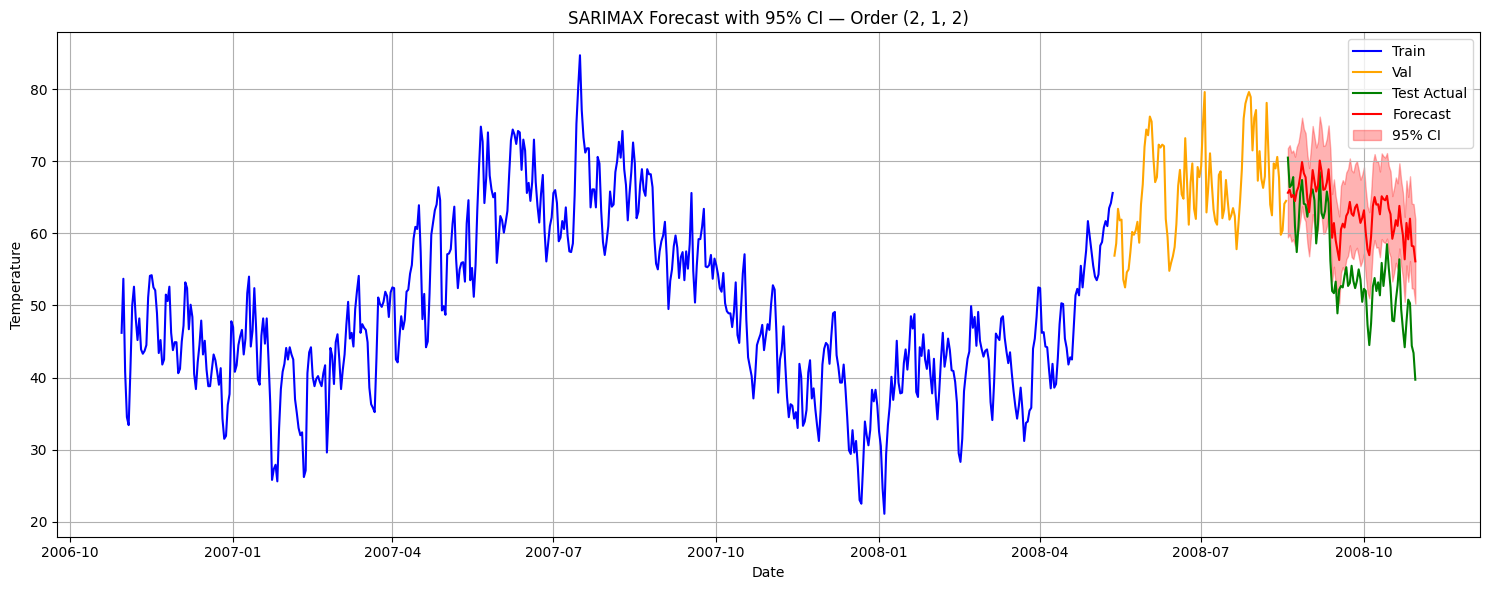

Bruksela model selection:   0%|                                                                 | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Bruksela model selection:   4%|██                                                       | 1/27 [00:00<00:06,  4.13it/s]

1
Order: (0, 0, 0), AICc: 3881.25, ADF p-value: 0.1478, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 0, 1)
2


Bruksela model selection:   7%|████▏                                                    | 2/27 [00:00<00:05,  4.32it/s]

1
Order: (0, 0, 1), AICc: 3552.08, ADF p-value: 0.1694, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 0, 2)
2


Bruksela model selection:  11%|██████▎                                                  | 3/27 [00:00<00:06,  3.83it/s]

1
Order: (0, 0, 2), AICc: 3445.11, ADF p-value: 0.2198, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 1, 0)
2
1
Order: (0, 1, 0), AICc: 3283.37, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3283.37


Bruksela model selection:  19%|██████████▌                                              | 5/27 [00:01<00:04,  5.00it/s]

(0, 1, 1)
2
1
Order: (0, 1, 1), AICc: 3266.65, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3266.65
(0, 1, 2)
2


Bruksela model selection:  22%|████████████▋                                            | 6/27 [00:01<00:04,  4.28it/s]

1
Order: (0, 1, 2), AICc: 3204.15, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(0, 2, 0)
2


Bruksela model selection:  26%|██████████████▊                                          | 7/27 [00:01<00:04,  4.37it/s]

1
Order: (0, 2, 0), AICc: 3784.23, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(0, 2, 1)
2


Bruksela model selection:  30%|████████████████▉                                        | 8/27 [00:01<00:04,  3.89it/s]

1
Order: (0, 2, 1), AICc: 3282.20, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(0, 2, 2)
2


Bruksela model selection:  33%|███████████████████                                      | 9/27 [00:02<00:06,  2.81it/s]

1
Order: (0, 2, 2), AICc: 3266.10, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(1, 0, 0)
2


Bruksela model selection:  37%|████████████████████▋                                   | 10/27 [00:02<00:05,  2.87it/s]

1
Order: (1, 0, 0), AICc: 3286.86, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(1, 0, 1)
2


Bruksela model selection:  41%|██████████████████████▊                                 | 11/27 [00:03<00:05,  2.92it/s]

1
Order: (1, 0, 1), AICc: 3270.14, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(1, 0, 2)
2


Bruksela model selection:  48%|██████████████████████████▉                             | 13/27 [00:03<00:04,  3.01it/s]

1
Order: (1, 0, 2), AICc: 3210.17, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3278.71, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3204.15
(1, 1, 1)
2


Bruksela model selection:  52%|█████████████████████████████                           | 14/27 [00:04<00:04,  3.07it/s]

1
Order: (1, 1, 1), AICc: 3202.23, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 3202.23
(1, 1, 2)
2


Bruksela model selection:  56%|███████████████████████████████                         | 15/27 [00:04<00:03,  3.16it/s]

1
Order: (1, 1, 2), AICc: 3191.82, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(1, 2, 0)
2


Bruksela model selection:  59%|█████████████████████████████████▏                      | 16/27 [00:04<00:03,  3.42it/s]

1
Order: (1, 2, 0), AICc: 3651.72, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(1, 2, 1)
2


Bruksela model selection:  63%|███████████████████████████████████▎                    | 17/27 [00:05<00:03,  3.07it/s]

1
Order: (1, 2, 1), AICc: 3278.25, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(1, 2, 2)
2


Bruksela model selection:  67%|█████████████████████████████████████▎                  | 18/27 [00:05<00:03,  2.66it/s]

1
Order: (1, 2, 2), AICc: 3281.66, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 0, 0)
2


Bruksela model selection:  70%|███████████████████████████████████████▍                | 19/27 [00:05<00:02,  2.69it/s]

1
Order: (2, 0, 0), AICc: 3277.52, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 0, 1)
2


Bruksela model selection:  74%|█████████████████████████████████████████▍              | 20/27 [00:06<00:03,  2.16it/s]

1
Order: (2, 0, 1), AICc: 3211.44, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 0, 2)
2


Bruksela model selection:  78%|███████████████████████████████████████████▌            | 21/27 [00:07<00:03,  1.85it/s]

1
Order: (2, 0, 2), AICc: 3198.62, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 1, 0)
2


Bruksela model selection:  81%|█████████████████████████████████████████████▋          | 22/27 [00:07<00:02,  2.23it/s]

1
Order: (2, 1, 0), AICc: 3240.33, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 1, 1)
2


Bruksela model selection:  85%|███████████████████████████████████████████████▋        | 23/27 [00:07<00:01,  2.62it/s]

1
Order: (2, 1, 1), AICc: 3196.82, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 1, 2)
2


Bruksela model selection:  89%|█████████████████████████████████████████████████▊      | 24/27 [00:08<00:01,  2.33it/s]

1
Order: (2, 1, 2), AICc: 3193.86, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 2, 0)
2


Bruksela model selection:  93%|███████████████████████████████████████████████████▊    | 25/27 [00:08<00:00,  2.65it/s]

1
Order: (2, 2, 0), AICc: 3549.39, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 2, 1)
2


Bruksela model selection:  96%|█████████████████████████████████████████████████████▉  | 26/27 [00:09<00:00,  2.38it/s]

1
Order: (2, 2, 1), AICc: 3244.95, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82
(2, 2, 2)
2


Bruksela model selection: 100%|████████████████████████████████████████████████████████| 27/27 [00:09<00:00,  2.71it/s]


1
Order: (2, 2, 2), AICc: 3206.50, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3191.82


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:20,  3.59it/s]

60.81001150769126
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:18,  3.89it/s]

57.021253422707716
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:00<00:17,  3.94it/s]

57.03606452556754
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:17,  4.03it/s]

55.01907603090048
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:01<00:17,  3.89it/s]

55.948979111590106
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:01<00:16,  4.03it/s]

54.658572212946716
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:01<00:16,  4.05it/s]

54.103500021108545
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:02<00:16,  4.00it/s]

55.95261558620846
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:02<00:15,  4.07it/s]

56.17397681510489
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:02<00:15,  4.10it/s]

55.68982270831185
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:02<00:15,  4.10it/s]

56.66548505232444
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:02<00:14,  4.10it/s]

55.59166201959909
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:03<00:14,  4.11it/s]

56.28768461615111
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:03<00:14,  4.05it/s]

53.5841019455057
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:03<00:14,  4.10it/s]

51.219879735610576
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:03<00:13,  4.14it/s]

53.3326919553966
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:04<00:13,  4.18it/s]

54.36838768775253
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:04<00:13,  4.20it/s]

54.29955535061973
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:04<00:13,  4.12it/s]

52.843502151506506
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:04<00:12,  4.16it/s]

52.65302903101675
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:05<00:12,  4.11it/s]

52.651271787138796
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:05<00:12,  4.09it/s]

51.99497412458004
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:05<00:12,  4.13it/s]

51.44014402251629
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:05<00:12,  4.06it/s]

50.41515536370429
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:06<00:11,  4.02it/s]

55.54610945878348
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:06<00:11,  4.06it/s]

54.728938421270556
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:06<00:11,  4.08it/s]

53.35420269007324
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:06<00:11,  4.05it/s]

51.8395168163064
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:07<00:10,  4.01it/s]

50.643930287904624
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:07<00:10,  4.01it/s]

53.23902494095577
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:07<00:10,  4.05it/s]

56.12275162081973
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:07<00:10,  4.04it/s]

54.1165298561657
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:08<00:09,  4.02it/s]

52.20990181817291
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:08<00:10,  3.82it/s]

47.24249095731429
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:08<00:09,  3.87it/s]

54.3728755445471
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:08<00:09,  3.83it/s]

49.98605375393234
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:09<00:09,  3.89it/s]

49.074190758587264
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:09<00:09,  3.84it/s]

49.82133894673302
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:09<00:08,  3.81it/s]

49.922531820785906
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:09<00:08,  3.83it/s]

43.911201247764026
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:10<00:08,  3.79it/s]

46.674255019387836
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:10<00:08,  3.72it/s]

41.28191729291823
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:10<00:07,  3.86it/s]

40.88921155203411
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:11<00:07,  3.94it/s]

40.555314537242054
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:11<00:07,  4.00it/s]

41.59568943454349
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:11<00:06,  4.08it/s]

44.64359163464049
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:11<00:06,  4.12it/s]

45.801298075229155
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:11<00:06,  4.04it/s]

47.40695262177471
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:12<00:05,  4.01it/s]

44.941753193899046
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:12<00:05,  3.93it/s]

50.81491486660384
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:12<00:05,  3.83it/s]

52.34091738459968
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:13<00:05,  3.87it/s]

52.59518974727124
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:13<00:05,  3.88it/s]

53.01581413411577
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:13<00:04,  3.98it/s]

54.09160202261134
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:13<00:04,  4.00it/s]

53.15323396300221
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:14<00:04,  3.98it/s]

49.5853057650359
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:14<00:04,  3.92it/s]

49.94251474914698
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:14<00:03,  3.92it/s]

52.138533397277186
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:14<00:03,  3.96it/s]

49.39146973011266
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:15<00:03,  3.89it/s]

48.60537643082395
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:15<00:03,  3.89it/s]

51.01229964929651
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:15<00:02,  3.93it/s]

51.163694519011855
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:15<00:02,  3.94it/s]

54.089626509317085
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:16<00:02,  3.95it/s]

52.59671426401515
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:16<00:02,  3.86it/s]

52.98380259141444
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:16<00:01,  3.87it/s]

54.84801215166554
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:16<00:01,  3.89it/s]

54.20493709787149
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:17<00:01,  3.95it/s]

51.42861130220196
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:17<00:01,  3.93it/s]

51.36420471046843
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:17<00:00,  3.94it/s]

53.30673323384386
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:17<00:00,  3.99it/s]

53.54117629443261
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:18<00:00,  3.92it/s]

53.20547839426329
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:18<00:00,  3.97it/s]

51.2638528773447
False
False


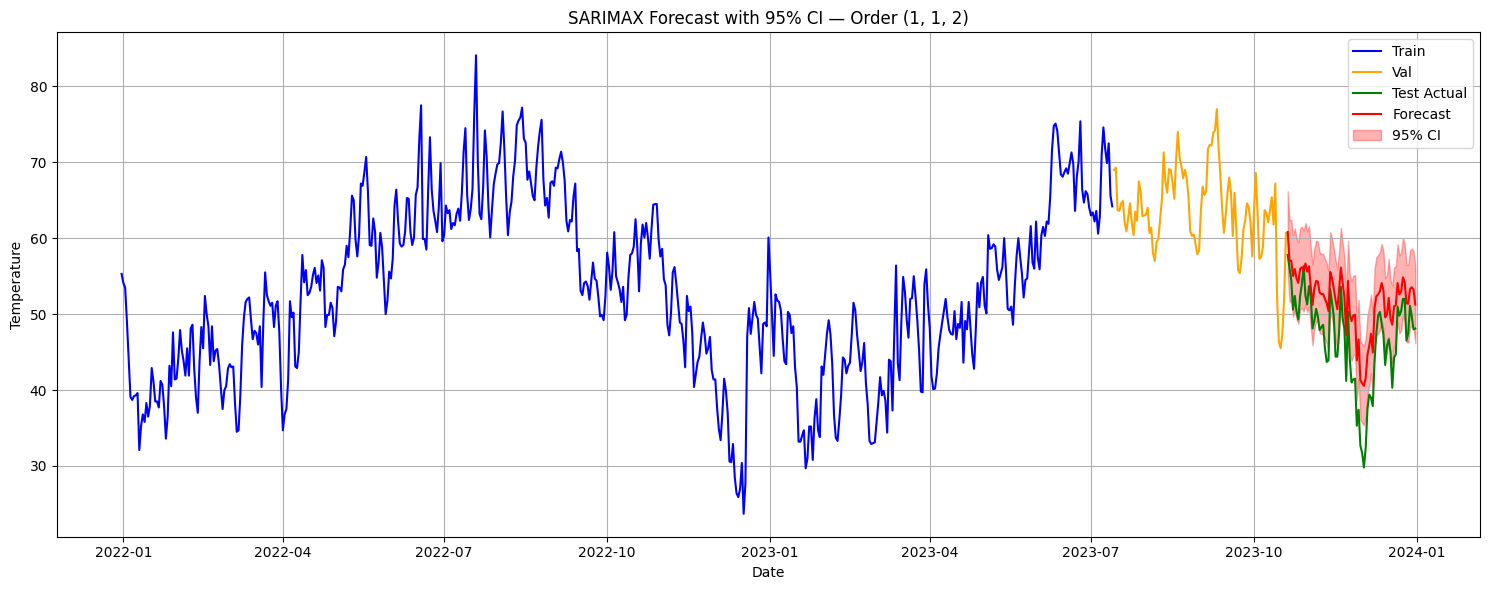

Budapeszt model selection:   0%|                                                                | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Budapeszt model selection:   4%|██                                                      | 1/27 [00:00<00:08,  2.94it/s]

1
Order: (0, 0, 0), AICc: 4433.95, ADF p-value: 0.0018, Best_Order: (0, 0, 0), Best_aicc: 4433.95
(0, 0, 1)
2


Budapeszt model selection:   7%|████▏                                                   | 2/27 [00:00<00:09,  2.69it/s]

1
Order: (0, 0, 1), AICc: 4117.49, ADF p-value: 0.0741, Best_Order: (0, 0, 0), Best_aicc: 4433.95
(0, 0, 2)
2


Budapeszt model selection:  15%|████████▎                                               | 4/27 [00:01<00:07,  3.02it/s]

1
Order: (0, 0, 2), AICc: 3948.06, ADF p-value: 0.1780, Best_Order: (0, 0, 0), Best_aicc: 4433.95
(0, 1, 0)
2
1
Order: (0, 1, 0), AICc: 3490.36, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3490.36
(0, 1, 1)
2


Budapeszt model selection:  19%|██████████▎                                             | 5/27 [00:01<00:05,  3.74it/s]

1
Order: (0, 1, 1), AICc: 3478.47, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3478.47
(0, 1, 2)
2


Budapeszt model selection:  22%|████████████▍                                           | 6/27 [00:01<00:05,  3.90it/s]

1
Order: (0, 1, 2), AICc: 3425.83, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(0, 2, 0)
2


Budapeszt model selection:  26%|██████████████▌                                         | 7/27 [00:02<00:04,  4.23it/s]

1
Order: (0, 2, 0), AICc: 3960.10, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(0, 2, 1)
2


Budapeszt model selection:  30%|████████████████▌                                       | 8/27 [00:02<00:05,  3.59it/s]

1
Order: (0, 2, 1), AICc: 3485.14, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(0, 2, 2)
2


Budapeszt model selection:  33%|██████████████████▋                                     | 9/27 [00:02<00:06,  2.80it/s]

1
Order: (0, 2, 2), AICc: 3476.87, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(1, 0, 0)
2


Budapeszt model selection:  37%|████████████████████▎                                  | 10/27 [00:03<00:05,  2.97it/s]

1
Order: (1, 0, 0), AICc: 3481.83, ADF p-value: 0.0016, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(1, 0, 1)
2


Budapeszt model selection:  41%|██████████████████████▍                                | 11/27 [00:03<00:06,  2.61it/s]

1
Order: (1, 0, 1), AICc: 3475.36, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(1, 0, 2)
2


Budapeszt model selection:  48%|██████████████████████████▍                            | 13/27 [00:04<00:05,  2.74it/s]

1
Order: (1, 0, 2), AICc: 3431.69, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3488.77, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(1, 1, 1)
2


Budapeszt model selection:  52%|████████████████████████████▌                          | 14/27 [00:04<00:04,  2.97it/s]

1
Order: (1, 1, 1), AICc: 3426.20, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3425.83
(1, 1, 2)
2


Budapeszt model selection:  56%|██████████████████████████████▌                        | 15/27 [00:05<00:03,  3.04it/s]

1
Order: (1, 1, 2), AICc: 3411.65, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(1, 2, 0)
2
1


Budapeszt model selection:  59%|████████████████████████████████▌                      | 16/27 [00:05<00:03,  3.49it/s]

Order: (1, 2, 0), AICc: 3839.78, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(1, 2, 1)
2


Budapeszt model selection:  63%|██████████████████████████████████▋                    | 17/27 [00:05<00:03,  3.33it/s]

1
Order: (1, 2, 1), AICc: 3484.68, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(1, 2, 2)
2


Budapeszt model selection:  67%|████████████████████████████████████▋                  | 18/27 [00:06<00:03,  2.61it/s]

1
Order: (1, 2, 2), AICc: 3483.99, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 0, 0)
2


Budapeszt model selection:  70%|██████████████████████████████████████▋                | 19/27 [00:06<00:03,  2.48it/s]

1
Order: (2, 0, 0), AICc: 3476.72, ADF p-value: 0.0008, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 0, 1)
2


Budapeszt model selection:  74%|████████████████████████████████████████▋              | 20/27 [00:07<00:03,  2.26it/s]

1
Order: (2, 0, 1), AICc: 3496.21, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 0, 2)
2


Budapeszt model selection:  78%|██████████████████████████████████████████▊            | 21/27 [00:07<00:02,  2.02it/s]

1
Order: (2, 0, 2), AICc: 3522.94, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 1, 0)
2
1


Budapeszt model selection:  81%|████████████████████████████████████████████▊          | 22/27 [00:07<00:02,  2.48it/s]

Order: (2, 1, 0), AICc: 3455.50, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 1, 1)
2


Budapeszt model selection:  85%|██████████████████████████████████████████████▊        | 23/27 [00:08<00:01,  2.73it/s]

1
Order: (2, 1, 1), AICc: 3419.94, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 1, 2)
2


Budapeszt model selection:  89%|████████████████████████████████████████████████▉      | 24/27 [00:08<00:01,  2.56it/s]

1
Order: (2, 1, 2), AICc: 3413.64, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 2, 0)
2


Budapeszt model selection:  93%|██████████████████████████████████████████████████▉    | 25/27 [00:08<00:00,  2.93it/s]

1
Order: (2, 2, 0), AICc: 3741.82, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 2, 1)
2


Budapeszt model selection:  96%|████████████████████████████████████████████████████▉  | 26/27 [00:09<00:00,  2.49it/s]

1
Order: (2, 2, 1), AICc: 3459.78, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65
(2, 2, 2)
2


Budapeszt model selection: 100%|███████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.65it/s]


1
Order: (2, 2, 2), AICc: 3417.81, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3411.65


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:21,  3.37it/s]

55.171419468172544
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:19,  3.60it/s]

57.383272212710935
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:00<00:20,  3.42it/s]

56.18133361044262
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:20,  3.33it/s]

54.93486522007264
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:01<00:20,  3.25it/s]

56.38577807648289
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:01<00:19,  3.36it/s]

55.94445624613602
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:02<00:19,  3.37it/s]

55.64958667500238
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:02<00:19,  3.35it/s]

55.96501014033744
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:02<00:19,  3.36it/s]

54.621752813112806
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:02<00:18,  3.42it/s]

54.871327463503576
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:03<00:18,  3.34it/s]

54.95081635825984
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:03<00:18,  3.26it/s]

54.22023272799812
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:03<00:18,  3.22it/s]

52.94257297783219
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:04<00:18,  3.18it/s]

53.21881825946278
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:04<00:18,  3.12it/s]

54.04744189070413
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:04<00:17,  3.17it/s]

51.515703078891555
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:05<00:17,  3.19it/s]

53.77117696113525
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:05<00:16,  3.24it/s]

52.226448856029805
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:05<00:16,  3.30it/s]

53.731907197977215
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:06<00:16,  3.27it/s]

50.84590298418686
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:06<00:15,  3.34it/s]

49.8256910959653
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:06<00:14,  3.42it/s]

51.364400519558956
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:06<00:14,  3.41it/s]

51.50182100143126
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:07<00:13,  3.52it/s]

48.32640481501648
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:07<00:13,  3.50it/s]

50.18076781317771
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:07<00:13,  3.54it/s]

53.63267322187731
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:08<00:12,  3.54it/s]

51.94496127191063
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:08<00:13,  3.42it/s]

50.89089628648329
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:08<00:12,  3.40it/s]

50.757657980426096
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:08<00:13,  3.30it/s]

47.41879632730064
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:09<00:12,  3.37it/s]

48.28683013056282
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:09<00:11,  3.42it/s]

51.167093237752354
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:09<00:11,  3.39it/s]

50.96982926153988
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:10<00:11,  3.38it/s]

49.15486224380918
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:10<00:11,  3.34it/s]

46.98492260759619
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:10<00:11,  3.35it/s]

48.36585514260303
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:11<00:10,  3.46it/s]

45.60395882359695
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:11<00:10,  3.46it/s]

44.538691147708676
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:11<00:09,  3.42it/s]

46.90599512644454
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:11<00:09,  3.51it/s]

49.410785007507535
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:12<00:09,  3.48it/s]

44.42027723035327
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:12<00:09,  3.39it/s]

46.550920742217514
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:12<00:08,  3.36it/s]

47.69331962295414
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:13<00:08,  3.38it/s]

48.34255288449433
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:13<00:08,  3.37it/s]

43.2541054149945
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:13<00:08,  3.34it/s]

43.47653422714841
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:13<00:07,  3.30it/s]

45.84392486682155
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:14<00:07,  3.19it/s]

47.61863037454897
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:14<00:07,  3.16it/s]

47.405018805080125
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:14<00:07,  3.18it/s]

47.214144929517055
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:15<00:06,  3.16it/s]

46.988207499774305
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:15<00:06,  3.12it/s]

47.32841724806599
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:15<00:06,  3.11it/s]

47.885496681951295
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:16<00:06,  3.13it/s]

49.192847588550016
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:16<00:05,  3.11it/s]

50.14741146051948
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:16<00:05,  3.15it/s]

50.15355679967736
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:17<00:05,  3.11it/s]

48.842708565270094
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:17<00:04,  3.13it/s]

46.79093514008625
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:17<00:04,  3.09it/s]

47.7773701633514
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:18<00:04,  3.11it/s]

47.38279620841827
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:18<00:03,  3.09it/s]

46.080705960546894
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:18<00:03,  3.09it/s]

47.422219711301
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:19<00:03,  3.07it/s]

48.64538851438898
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:19<00:02,  3.06it/s]

47.97874130416601
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:19<00:02,  3.04it/s]

47.21415568563646
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:20<00:02,  3.09it/s]

49.34904919289276
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:20<00:01,  3.13it/s]

52.07786738464221
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:20<00:01,  3.15it/s]

50.69692358668749
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:21<00:01,  3.17it/s]

48.72416114322055
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:21<00:00,  3.19it/s]

48.72418550619625
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:21<00:00,  3.23it/s]

48.76365325433997
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:21<00:00,  3.26it/s]

49.0398584623111
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:22<00:00,  3.27it/s]

50.065724442941736
False
False


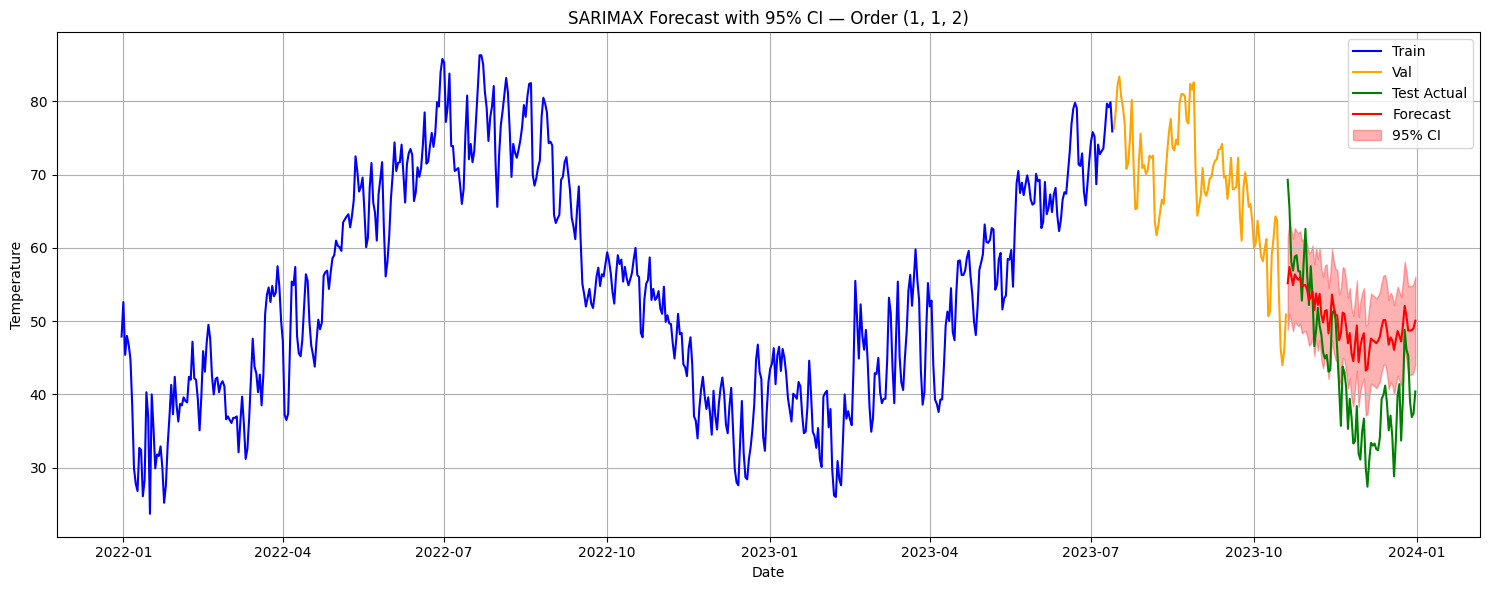

Lisbona model selection:   0%|                                                                  | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Lisbona model selection:   7%|████▎                                                     | 2/27 [00:00<00:05,  4.78it/s]

1
Order: (0, 0, 0), AICc: 4000.18, ADF p-value: 0.0000, Best_Order: (0, 0, 0), Best_aicc: 4000.18
(0, 0, 1)
2
1
Order: (0, 0, 1), AICc: 3687.00, ADF p-value: 0.0001, Best_Order: (0, 0, 1), Best_aicc: 3687.00
(0, 0, 2)
2


Lisbona model selection:  15%|████████▌                                                 | 4/27 [00:01<00:06,  3.82it/s]

1
Order: (0, 0, 2), AICc: 3541.99, ADF p-value: 0.0263, Best_Order: (0, 0, 2), Best_aicc: 3541.99
(0, 1, 0)
2
1
Order: (0, 1, 0), AICc: 3093.81, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3093.81
(0, 1, 1)
2


Lisbona model selection:  19%|██████████▋                                               | 5/27 [00:01<00:04,  4.58it/s]

1
Order: (0, 1, 1), AICc: 3090.77, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3090.77
(0, 1, 2)
2
1


Lisbona model selection:  22%|████████████▉                                             | 6/27 [00:01<00:04,  4.81it/s]

Order: (0, 1, 2), AICc: 3029.69, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(0, 2, 0)
2
1
Order: (0, 2, 0), AICc: 3528.96, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69


Lisbona model selection:  26%|███████████████                                           | 7/27 [00:01<00:03,  5.04it/s]

(0, 2, 1)
2


Lisbona model selection:  30%|█████████████████▏                                        | 8/27 [00:01<00:04,  3.91it/s]

1
Order: (0, 2, 1), AICc: 3093.24, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(0, 2, 2)
2


Lisbona model selection:  33%|███████████████████▎                                      | 9/27 [00:02<00:05,  3.10it/s]

1
Order: (0, 2, 2), AICc: 3086.83, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(1, 0, 0)
2


Lisbona model selection:  37%|█████████████████████                                    | 10/27 [00:02<00:05,  3.06it/s]

1
Order: (1, 0, 0), AICc: 3078.68, ADF p-value: 0.0112, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(1, 0, 1)
2


Lisbona model selection:  41%|███████████████████████▏                                 | 11/27 [00:03<00:06,  2.59it/s]

1
Order: (1, 0, 1), AICc: 3090.07, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(1, 0, 2)
2


Lisbona model selection:  48%|███████████████████████████▍                             | 13/27 [00:04<00:05,  2.73it/s]

1
Order: (1, 0, 2), AICc: 3143.61, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3095.69, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(1, 1, 1)
2


Lisbona model selection:  52%|█████████████████████████████▌                           | 14/27 [00:04<00:04,  3.01it/s]

1
Order: (1, 1, 1), AICc: 3038.97, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3029.69
(1, 1, 2)
2


Lisbona model selection:  59%|█████████████████████████████████▊                       | 16/27 [00:04<00:02,  3.92it/s]

1
Order: (1, 1, 2), AICc: 3016.25, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(1, 2, 0)
2
1
Order: (1, 2, 0), AICc: 3429.09, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(1, 2, 1)
2


Lisbona model selection:  63%|███████████████████████████████████▉                     | 17/27 [00:05<00:02,  3.34it/s]

1
Order: (1, 2, 1), AICc: 3095.28, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(1, 2, 2)
2


Lisbona model selection:  67%|██████████████████████████████████████                   | 18/27 [00:05<00:03,  2.75it/s]

1
Order: (1, 2, 2), AICc: 3082.57, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 0, 0)
2


Lisbona model selection:  70%|████████████████████████████████████████                 | 19/27 [00:06<00:03,  2.47it/s]

1
Order: (2, 0, 0), AICc: 3076.60, ADF p-value: 0.0136, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 0, 1)
2


Lisbona model selection:  74%|██████████████████████████████████████████▏              | 20/27 [00:06<00:03,  2.01it/s]

1
Order: (2, 0, 1), AICc: 3195.75, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 0, 2)
2


Lisbona model selection:  78%|████████████████████████████████████████████▎            | 21/27 [00:07<00:03,  1.80it/s]

1
Order: (2, 0, 2), AICc: 3225.54, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 1, 0)
2
1
Order: (2, 1, 0), AICc: 3057.07, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25


Lisbona model selection:  81%|██████████████████████████████████████████████▍          | 22/27 [00:07<00:02,  2.25it/s]

(2, 1, 1)
2


Lisbona model selection:  85%|████████████████████████████████████████████████▌        | 23/27 [00:08<00:01,  2.52it/s]

1
Order: (2, 1, 1), AICc: 3019.96, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 1, 2)
2


Lisbona model selection:  89%|██████████████████████████████████████████████████▋      | 24/27 [00:08<00:01,  2.52it/s]

1
Order: (2, 1, 2), AICc: 3017.68, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 2, 0)
2
1


Lisbona model selection:  93%|████████████████████████████████████████████████████▊    | 25/27 [00:08<00:00,  2.95it/s]

Order: (2, 2, 0), AICc: 3342.07, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 2, 1)
2


Lisbona model selection:  96%|██████████████████████████████████████████████████████▉  | 26/27 [00:08<00:00,  2.98it/s]

1
Order: (2, 2, 1), AICc: 3061.72, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25
(2, 2, 2)
2


Lisbona model selection: 100%|█████████████████████████████████████████████████████████| 27/27 [00:09<00:00,  2.80it/s]


1
Order: (2, 2, 2), AICc: 3021.59, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3016.25


Analysed test_samples from:   0%|                                                               | 0/70 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/70 [00:00<00:17,  3.98it/s]

55.638533504210656
1


Analysed test_samples from:   3%|█▌                                                     | 2/70 [00:00<00:17,  3.93it/s]

54.34913602586294
1


Analysed test_samples from:   4%|██▎                                                    | 3/70 [00:00<00:17,  3.91it/s]

55.581947377416775
1


Analysed test_samples from:   6%|███▏                                                   | 4/70 [00:01<00:17,  3.78it/s]

54.2796588053433
1


Analysed test_samples from:   7%|███▉                                                   | 5/70 [00:01<00:17,  3.69it/s]

54.83680029491033
1


Analysed test_samples from:   9%|████▋                                                  | 6/70 [00:01<00:17,  3.62it/s]

56.554787309373154
1


Analysed test_samples from:  10%|█████▌                                                 | 7/70 [00:01<00:17,  3.69it/s]

57.00424405027884
1


Analysed test_samples from:  11%|██████▎                                                | 8/70 [00:02<00:16,  3.80it/s]

57.474946931149795
1


Analysed test_samples from:  13%|███████                                                | 9/70 [00:02<00:15,  3.82it/s]

56.780300394964776
1


Analysed test_samples from:  14%|███████▋                                              | 10/70 [00:02<00:15,  3.80it/s]

57.13698042825364
1


Analysed test_samples from:  16%|████████▍                                             | 11/70 [00:02<00:15,  3.89it/s]

56.143105598330386
1


Analysed test_samples from:  17%|█████████▎                                            | 12/70 [00:03<00:14,  3.96it/s]

56.177022648277834
1


Analysed test_samples from:  19%|██████████                                            | 13/70 [00:03<00:14,  4.02it/s]

56.76094274411291
1


Analysed test_samples from:  20%|██████████▊                                           | 14/70 [00:03<00:13,  4.01it/s]

56.930625070022714
1


Analysed test_samples from:  21%|███████████▌                                          | 15/70 [00:03<00:13,  3.97it/s]

56.23478676507199
1


Analysed test_samples from:  23%|████████████▎                                         | 16/70 [00:04<00:13,  3.98it/s]

55.47108597816368
1


Analysed test_samples from:  24%|█████████████                                         | 17/70 [00:04<00:12,  4.08it/s]

56.31961238613876
1


Analysed test_samples from:  26%|█████████████▉                                        | 18/70 [00:04<00:12,  4.07it/s]

56.83885001295771
1


Analysed test_samples from:  27%|██████████████▋                                       | 19/70 [00:04<00:12,  4.07it/s]

57.30344138029423
1


Analysed test_samples from:  29%|███████████████▍                                      | 20/70 [00:05<00:12,  3.96it/s]

57.324873503656335
1


Analysed test_samples from:  30%|████████████████▏                                     | 21/70 [00:05<00:12,  3.87it/s]

57.466400663936895
1


Analysed test_samples from:  31%|████████████████▉                                     | 22/70 [00:05<00:12,  3.88it/s]

56.805448534775266
1


Analysed test_samples from:  33%|█████████████████▋                                    | 23/70 [00:05<00:12,  3.83it/s]

57.11389813321358
1


Analysed test_samples from:  34%|██████████████████▌                                   | 24/70 [00:06<00:12,  3.78it/s]

56.79512934365613
1


Analysed test_samples from:  36%|███████████████████▎                                  | 25/70 [00:06<00:12,  3.67it/s]

56.93088445148352
1


Analysed test_samples from:  37%|████████████████████                                  | 26/70 [00:06<00:11,  3.67it/s]

57.08361411766375
1


Analysed test_samples from:  39%|████████████████████▊                                 | 27/70 [00:07<00:11,  3.62it/s]

57.42941204706231
1


Analysed test_samples from:  40%|█████████████████████▌                                | 28/70 [00:07<00:11,  3.69it/s]

56.540571636158276
1


Analysed test_samples from:  41%|██████████████████████▎                               | 29/70 [00:07<00:10,  3.79it/s]

56.681377151938456
1


Analysed test_samples from:  43%|███████████████████████▏                              | 30/70 [00:07<00:10,  3.76it/s]

55.634026456029716
1


Analysed test_samples from:  44%|███████████████████████▉                              | 31/70 [00:08<00:10,  3.79it/s]

54.39265484712358
1


Analysed test_samples from:  46%|████████████████████████▋                             | 32/70 [00:08<00:10,  3.73it/s]

53.696869498821115
1


Analysed test_samples from:  47%|█████████████████████████▍                            | 33/70 [00:08<00:09,  3.72it/s]

53.78178168325519
1


Analysed test_samples from:  49%|██████████████████████████▏                           | 34/70 [00:08<00:09,  3.70it/s]

55.49835638682394
1


Analysed test_samples from:  50%|███████████████████████████                           | 35/70 [00:09<00:09,  3.67it/s]

56.08978612097363
1


Analysed test_samples from:  51%|███████████████████████████▊                          | 36/70 [00:09<00:09,  3.68it/s]

56.46314157245405
1


Analysed test_samples from:  53%|████████████████████████████▌                         | 37/70 [00:09<00:09,  3.46it/s]

57.17594634449375
1


Analysed test_samples from:  54%|█████████████████████████████▎                        | 38/70 [00:10<00:09,  3.42it/s]

58.08038471927539
1


Analysed test_samples from:  56%|██████████████████████████████                        | 39/70 [00:10<00:09,  3.37it/s]

57.54924819642701
1


Analysed test_samples from:  57%|██████████████████████████████▊                       | 40/70 [00:10<00:08,  3.36it/s]

57.49833473668315
1


Analysed test_samples from:  59%|███████████████████████████████▋                      | 41/70 [00:10<00:08,  3.41it/s]

57.1653254813356
1


Analysed test_samples from:  60%|████████████████████████████████▍                     | 42/70 [00:11<00:08,  3.50it/s]

57.141995033961166
1


Analysed test_samples from:  61%|█████████████████████████████████▏                    | 43/70 [00:11<00:07,  3.51it/s]

57.379583358215875
1


Analysed test_samples from:  63%|█████████████████████████████████▉                    | 44/70 [00:11<00:07,  3.53it/s]

57.41352950418796
1


Analysed test_samples from:  64%|██████████████████████████████████▋                   | 45/70 [00:12<00:07,  3.51it/s]

57.24382461324576
1


Analysed test_samples from:  66%|███████████████████████████████████▍                  | 46/70 [00:12<00:06,  3.47it/s]

57.09108370784904
1


Analysed test_samples from:  67%|████████████████████████████████████▎                 | 47/70 [00:12<00:06,  3.43it/s]

56.93834461757357
1


Analysed test_samples from:  69%|█████████████████████████████████████                 | 48/70 [00:12<00:06,  3.43it/s]

55.648589145313146
1


Analysed test_samples from:  70%|█████████████████████████████████████▊                | 49/70 [00:13<00:06,  3.27it/s]

55.66555281402784
1


Analysed test_samples from:  71%|██████████████████████████████████████▌               | 50/70 [00:13<00:06,  3.27it/s]

56.734692586724194
1


Analysed test_samples from:  73%|███████████████████████████████████████▎              | 51/70 [00:13<00:05,  3.28it/s]

56.84949887695948
1


Analysed test_samples from:  74%|████████████████████████████████████████              | 52/70 [00:14<00:05,  3.30it/s]

56.60551274991194
1


Analysed test_samples from:  76%|████████████████████████████████████████▉             | 53/70 [00:14<00:05,  3.31it/s]

57.05712610010603
1


Analysed test_samples from:  77%|█████████████████████████████████████████▋            | 54/70 [00:14<00:04,  3.31it/s]

57.20985894896014
1


Analysed test_samples from:  79%|██████████████████████████████████████████▍           | 55/70 [00:15<00:04,  3.31it/s]

57.82835331767006
1


Analysed test_samples from:  80%|███████████████████████████████████████████▏          | 56/70 [00:15<00:04,  3.20it/s]

57.294699655871824
1


Analysed test_samples from:  81%|███████████████████████████████████████████▉          | 57/70 [00:15<00:04,  3.11it/s]

57.14196677778301
1


Analysed test_samples from:  83%|████████████████████████████████████████████▋         | 58/70 [00:16<00:03,  3.09it/s]

56.95529618371146
1


Analysed test_samples from:  84%|█████████████████████████████████████████████▌        | 59/70 [00:16<00:03,  3.11it/s]

56.93832742628798
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▎       | 60/70 [00:16<00:03,  3.09it/s]

57.115466894582184
1


Analysed test_samples from:  87%|███████████████████████████████████████████████       | 61/70 [00:17<00:02,  3.10it/s]

57.35304371577831
1


Analysed test_samples from:  89%|███████████████████████████████████████████████▊      | 62/70 [00:17<00:02,  3.00it/s]

57.12052445897405
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▌     | 63/70 [00:17<00:02,  3.02it/s]

56.91186325923353
1


Analysed test_samples from:  91%|█████████████████████████████████████████████████▎    | 64/70 [00:18<00:01,  3.02it/s]

57.09852498931692
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▏   | 65/70 [00:18<00:01,  3.06it/s]

56.79309402059438
1


Analysed test_samples from:  94%|██████████████████████████████████████████████████▉   | 66/70 [00:18<00:01,  3.18it/s]

56.7761657519561
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▋  | 67/70 [00:19<00:00,  3.22it/s]

56.301025572563645
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▍ | 68/70 [00:19<00:00,  3.19it/s]

56.89494198862489
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▏| 69/70 [00:19<00:00,  3.25it/s]

57.30224965775684
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 70/70 [00:19<00:00,  3.51it/s]

56.419846653620056
False
False


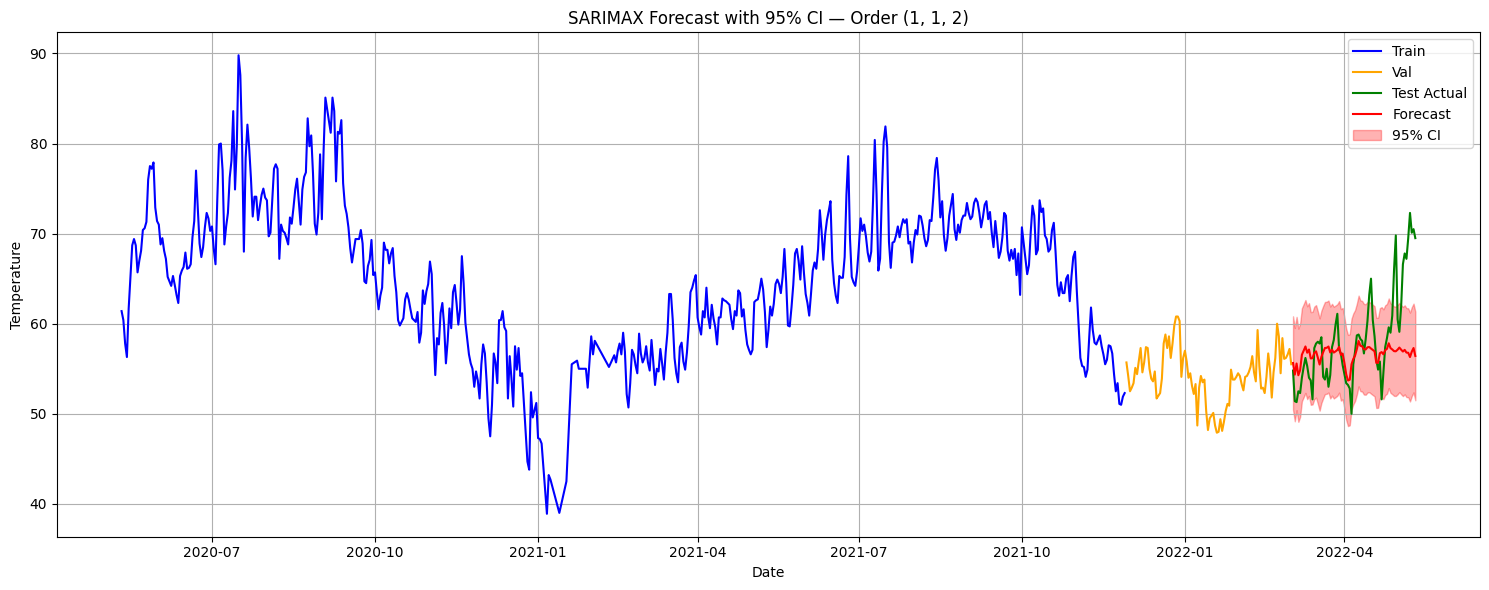

Londyn model selection:   0%|                                                                   | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Londyn model selection:   4%|██▏                                                        | 1/27 [00:00<00:08,  3.12it/s]

1
Order: (0, 0, 0), AICc: 3531.24, ADF p-value: 0.0000, Best_Order: (0, 0, 0), Best_aicc: 3531.24
(0, 0, 1)
2


Londyn model selection:   7%|████▎                                                      | 2/27 [00:00<00:07,  3.31it/s]

1
Order: (0, 0, 1), AICc: 3247.42, ADF p-value: 0.0000, Best_Order: (0, 0, 1), Best_aicc: 3247.42
(0, 0, 2)
2


Londyn model selection:  11%|██████▌                                                    | 3/27 [00:00<00:07,  3.00it/s]

1
Order: (0, 0, 2), AICc: 3147.15, ADF p-value: 0.0000, Best_Order: (0, 0, 2), Best_aicc: 3147.15
(0, 1, 0)
2
1


Londyn model selection:  15%|████████▋                                                  | 4/27 [00:01<00:06,  3.55it/s]

Order: (0, 1, 0), AICc: 2978.23, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 2978.23
(0, 1, 1)
2
1
Order: (0, 1, 1), AICc: 2970.09, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 2970.09


Londyn model selection:  22%|█████████████                                              | 6/27 [00:01<00:04,  4.32it/s]

(0, 1, 2)
2
1
Order: (0, 1, 2), AICc: 2913.23, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23


Londyn model selection:  26%|███████████████▎                                           | 7/27 [00:01<00:04,  4.61it/s]

(0, 2, 0)
2
1
Order: (0, 2, 0), AICc: 3456.92, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(0, 2, 1)
2


Londyn model selection:  30%|█████████████████▍                                         | 8/27 [00:02<00:05,  3.65it/s]

1
Order: (0, 2, 1), AICc: 2977.13, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(0, 2, 2)
2


Londyn model selection:  33%|███████████████████▋                                       | 9/27 [00:02<00:06,  2.87it/s]

1
Order: (0, 2, 2), AICc: 2970.76, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(1, 0, 0)
2


Londyn model selection:  37%|█████████████████████▍                                    | 10/27 [00:03<00:05,  2.90it/s]

1
Order: (1, 0, 0), AICc: 2981.98, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(1, 0, 1)
2


Londyn model selection:  41%|███████████████████████▋                                  | 11/27 [00:03<00:05,  2.85it/s]

1
Order: (1, 0, 1), AICc: 2975.01, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(1, 0, 2)
2


Londyn model selection:  44%|█████████████████████████▊                                | 12/27 [00:03<00:06,  2.37it/s]

1
Order: (1, 0, 2), AICc: 2918.61, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(1, 1, 0)
2


Londyn model selection:  48%|███████████████████████████▉                              | 13/27 [00:04<00:04,  2.80it/s]

1
Order: (1, 1, 0), AICc: 2977.24, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 2913.23
(1, 1, 1)
2


Londyn model selection:  52%|██████████████████████████████                            | 14/27 [00:04<00:04,  2.74it/s]

1
Order: (1, 1, 1), AICc: 2904.19, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 2904.19
(1, 1, 2)
2


Londyn model selection:  56%|████████████████████████████████▏                         | 15/27 [00:04<00:04,  2.72it/s]

1
Order: (1, 1, 2), AICc: 2891.63, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(1, 2, 0)
2


Londyn model selection:  59%|██████████████████████████████████▎                       | 16/27 [00:05<00:03,  2.88it/s]

1
Order: (1, 2, 0), AICc: 3325.44, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(1, 2, 1)
2


Londyn model selection:  63%|████████████████████████████████████▌                     | 17/27 [00:05<00:03,  2.70it/s]

1
Order: (1, 2, 1), AICc: 2977.37, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(1, 2, 2)
2


Londyn model selection:  67%|██████████████████████████████████████▋                   | 18/27 [00:06<00:03,  2.49it/s]

1
Order: (1, 2, 2), AICc: 2977.02, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 0, 0)
2


Londyn model selection:  70%|████████████████████████████████████████▊                 | 19/27 [00:06<00:03,  2.45it/s]

1
Order: (2, 0, 0), AICc: 2976.98, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 0, 1)
2


Londyn model selection:  74%|██████████████████████████████████████████▉               | 20/27 [00:07<00:03,  2.14it/s]

1
Order: (2, 0, 1), AICc: 3001.97, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 0, 2)
2


Londyn model selection:  78%|█████████████████████████████████████████████             | 21/27 [00:07<00:03,  1.91it/s]

1
Order: (2, 0, 2), AICc: 2996.36, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 1, 0)
2
1


Londyn model selection:  81%|███████████████████████████████████████████████▎          | 22/27 [00:08<00:02,  2.33it/s]

Order: (2, 1, 0), AICc: 2947.42, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 1, 1)
2


Londyn model selection:  85%|█████████████████████████████████████████████████▍        | 23/27 [00:08<00:01,  2.51it/s]

1
Order: (2, 1, 1), AICc: 2895.85, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 1, 2)
2


Londyn model selection:  89%|███████████████████████████████████████████████████▌      | 24/27 [00:08<00:01,  2.62it/s]

1
Order: (2, 1, 2), AICc: 2893.32, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 2, 0)
2


Londyn model selection:  93%|█████████████████████████████████████████████████████▋    | 25/27 [00:08<00:00,  2.83it/s]

1
Order: (2, 2, 0), AICc: 3240.10, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 2, 1)
2


Londyn model selection:  96%|███████████████████████████████████████████████████████▊  | 26/27 [00:09<00:00,  2.55it/s]

1
Order: (2, 2, 1), AICc: 2952.40, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63
(2, 2, 2)
2


Londyn model selection: 100%|██████████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.64it/s]


1
Order: (2, 2, 2), AICc: 2901.26, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 2891.63


Analysed test_samples from:   0%|                                                               | 0/72 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/72 [00:00<00:23,  3.07it/s]

53.700043525275596
1


Analysed test_samples from:   3%|█▌                                                     | 2/72 [00:00<00:24,  2.89it/s]

52.128507687567506
1


Analysed test_samples from:   4%|██▎                                                    | 3/72 [00:01<00:24,  2.81it/s]

53.53918838468976
1


Analysed test_samples from:   6%|███                                                    | 4/72 [00:01<00:21,  3.20it/s]

52.35377654490019
1


Analysed test_samples from:   7%|███▊                                                   | 5/72 [00:01<00:19,  3.48it/s]

51.746621572936064
1


Analysed test_samples from:   8%|████▌                                                  | 6/72 [00:01<00:21,  3.02it/s]

53.487163908133965
1


Analysed test_samples from:  10%|█████▎                                                 | 7/72 [00:02<00:22,  2.90it/s]

53.03800287357925
1


Analysed test_samples from:  11%|██████                                                 | 8/72 [00:02<00:19,  3.22it/s]

54.00379146973812
1


Analysed test_samples from:  12%|██████▉                                                | 9/72 [00:02<00:18,  3.36it/s]

52.31339117579628
1


Analysed test_samples from:  14%|███████▌                                              | 10/72 [00:03<00:19,  3.24it/s]

52.310426618758115
1


Analysed test_samples from:  15%|████████▎                                             | 11/72 [00:03<00:18,  3.23it/s]

53.68333454251308
1


Analysed test_samples from:  17%|█████████                                             | 12/72 [00:03<00:19,  3.12it/s]

52.7681885200096
1


Analysed test_samples from:  18%|█████████▊                                            | 13/72 [00:04<00:18,  3.22it/s]

50.46784121817875
1


Analysed test_samples from:  19%|██████████▌                                           | 14/72 [00:04<00:17,  3.28it/s]

50.491993637327695
1


Analysed test_samples from:  21%|███████████▎                                          | 15/72 [00:04<00:16,  3.38it/s]

49.9344476607515
1


Analysed test_samples from:  22%|████████████                                          | 16/72 [00:04<00:16,  3.42it/s]

50.79100638119145
1


Analysed test_samples from:  24%|████████████▊                                         | 17/72 [00:05<00:15,  3.60it/s]

49.97866797190333
1


Analysed test_samples from:  25%|█████████████▌                                        | 18/72 [00:05<00:14,  3.67it/s]

49.93279515215053
1


Analysed test_samples from:  26%|██████████████▎                                       | 19/72 [00:05<00:14,  3.67it/s]

50.487365395534
1


Analysed test_samples from:  28%|███████████████                                       | 20/72 [00:06<00:14,  3.71it/s]

48.490592019215754
1


Analysed test_samples from:  29%|███████████████▊                                      | 21/72 [00:06<00:13,  3.70it/s]

48.341795820833795
1


Analysed test_samples from:  31%|████████████████▌                                     | 22/72 [00:06<00:13,  3.70it/s]

47.665369471405114
1


Analysed test_samples from:  32%|█████████████████▎                                    | 23/72 [00:06<00:12,  3.79it/s]

49.90286331609413
1


Analysed test_samples from:  33%|██████████████████                                    | 24/72 [00:07<00:12,  3.72it/s]

51.746959805386325
1


Analysed test_samples from:  35%|██████████████████▊                                   | 25/72 [00:07<00:12,  3.70it/s]

51.34489200280452
1


Analysed test_samples from:  36%|███████████████████▌                                  | 26/72 [00:07<00:12,  3.67it/s]

49.27826461388156
1


Analysed test_samples from:  38%|████████████████████▎                                 | 27/72 [00:07<00:12,  3.65it/s]

46.4605339552424
1


Analysed test_samples from:  39%|█████████████████████                                 | 28/72 [00:08<00:12,  3.62it/s]

47.95628874844493
1


Analysed test_samples from:  40%|█████████████████████▊                                | 29/72 [00:08<00:11,  3.61it/s]

53.56417949204265
1


Analysed test_samples from:  42%|██████████████████████▌                               | 30/72 [00:08<00:11,  3.64it/s]

51.64631315907371
1


Analysed test_samples from:  43%|███████████████████████▎                              | 31/72 [00:09<00:11,  3.64it/s]

50.91423062183446
1


Analysed test_samples from:  44%|████████████████████████                              | 32/72 [00:09<00:10,  3.65it/s]

50.98927170052613
1


Analysed test_samples from:  46%|████████████████████████▊                             | 33/72 [00:09<00:10,  3.67it/s]

48.729831274915355
1


Analysed test_samples from:  47%|█████████████████████████▌                            | 34/72 [00:09<00:10,  3.61it/s]

52.90933255062059
1


Analysed test_samples from:  49%|██████████████████████████▎                           | 35/72 [00:10<00:10,  3.54it/s]

44.833699823752355
1


Analysed test_samples from:  50%|███████████████████████████                           | 36/72 [00:10<00:10,  3.58it/s]

40.191641441204226
1


Analysed test_samples from:  51%|███████████████████████████▋                          | 37/72 [00:10<00:09,  3.59it/s]

43.49328744124696
1


Analysed test_samples from:  53%|████████████████████████████▌                         | 38/72 [00:10<00:09,  3.66it/s]

49.11095497936694
1


Analysed test_samples from:  54%|█████████████████████████████▏                        | 39/72 [00:11<00:08,  3.75it/s]

45.00505099955254
1


Analysed test_samples from:  56%|██████████████████████████████                        | 40/72 [00:11<00:09,  3.37it/s]

41.707761754281115
1


Analysed test_samples from:  57%|██████████████████████████████▊                       | 41/72 [00:11<00:09,  3.21it/s]

39.191946516891136
1


Analysed test_samples from:  58%|███████████████████████████████▌                      | 42/72 [00:12<00:09,  3.05it/s]

38.288667040632426
1


Analysed test_samples from:  60%|████████████████████████████████▎                     | 43/72 [00:12<00:08,  3.24it/s]

37.868587392876
1


Analysed test_samples from:  61%|█████████████████████████████████                     | 44/72 [00:12<00:08,  3.16it/s]

45.85076541164648
1


Analysed test_samples from:  62%|█████████████████████████████████▊                    | 45/72 [00:13<00:08,  3.26it/s]

46.22620817195936
1


Analysed test_samples from:  64%|██████████████████████████████████▌                   | 46/72 [00:13<00:07,  3.35it/s]

45.51218617383205
1


Analysed test_samples from:  65%|███████████████████████████████████▎                  | 47/72 [00:13<00:07,  3.40it/s]

43.891413699276185
1


Analysed test_samples from:  67%|████████████████████████████████████                  | 48/72 [00:14<00:07,  3.13it/s]

46.64817171204582
1


Analysed test_samples from:  68%|████████████████████████████████████▊                 | 49/72 [00:14<00:07,  3.27it/s]

48.89402277093959
1


Analysed test_samples from:  69%|█████████████████████████████████████▌                | 50/72 [00:14<00:06,  3.27it/s]

49.627645195047776
1


Analysed test_samples from:  71%|██████████████████████████████████████▎               | 51/72 [00:14<00:06,  3.37it/s]

49.21052560504836
1


Analysed test_samples from:  72%|███████████████████████████████████████               | 52/72 [00:15<00:05,  3.49it/s]

49.370924713732194
1


Analysed test_samples from:  74%|███████████████████████████████████████▊              | 53/72 [00:15<00:05,  3.25it/s]

51.256687660737
1


Analysed test_samples from:  75%|████████████████████████████████████████▌             | 54/72 [00:15<00:06,  3.00it/s]

47.82868295651171
1


Analysed test_samples from:  76%|█████████████████████████████████████████▎            | 55/72 [00:16<00:05,  3.15it/s]

45.91721955803389
1


Analysed test_samples from:  78%|██████████████████████████████████████████            | 56/72 [00:16<00:05,  3.08it/s]

46.53768062389028
1


Analysed test_samples from:  79%|██████████████████████████████████████████▊           | 57/72 [00:16<00:05,  2.93it/s]

51.00293851896077
1


Analysed test_samples from:  81%|███████████████████████████████████████████▌          | 58/72 [00:17<00:04,  2.90it/s]

50.032123240027886
1


Analysed test_samples from:  82%|████████████████████████████████████████████▎         | 59/72 [00:17<00:04,  3.15it/s]

51.11488389619551
1


Analysed test_samples from:  83%|█████████████████████████████████████████████         | 60/72 [00:17<00:03,  3.27it/s]

50.84511096396315
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 61/72 [00:18<00:03,  3.34it/s]

49.16440782718508
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 62/72 [00:18<00:03,  3.09it/s]

51.80241246433608
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 63/72 [00:18<00:02,  3.01it/s]

50.754896851393795
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 64/72 [00:19<00:02,  2.93it/s]

52.227575757606246
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 65/72 [00:19<00:02,  3.11it/s]

56.44374137895359
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 66/72 [00:19<00:01,  3.19it/s]

54.92519439958987
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 67/72 [00:20<00:01,  3.29it/s]

47.32231620660458
1


Analysed test_samples from:  94%|███████████████████████████████████████████████████   | 68/72 [00:20<00:01,  3.34it/s]

50.66854982755782
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 69/72 [00:20<00:00,  3.33it/s]

49.90038885031902
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 70/72 [00:20<00:00,  3.37it/s]

49.64257022854768
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 71/72 [00:21<00:00,  3.35it/s]

50.12571523285525
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 72/72 [00:21<00:00,  3.34it/s]

48.21790834734276
False
False


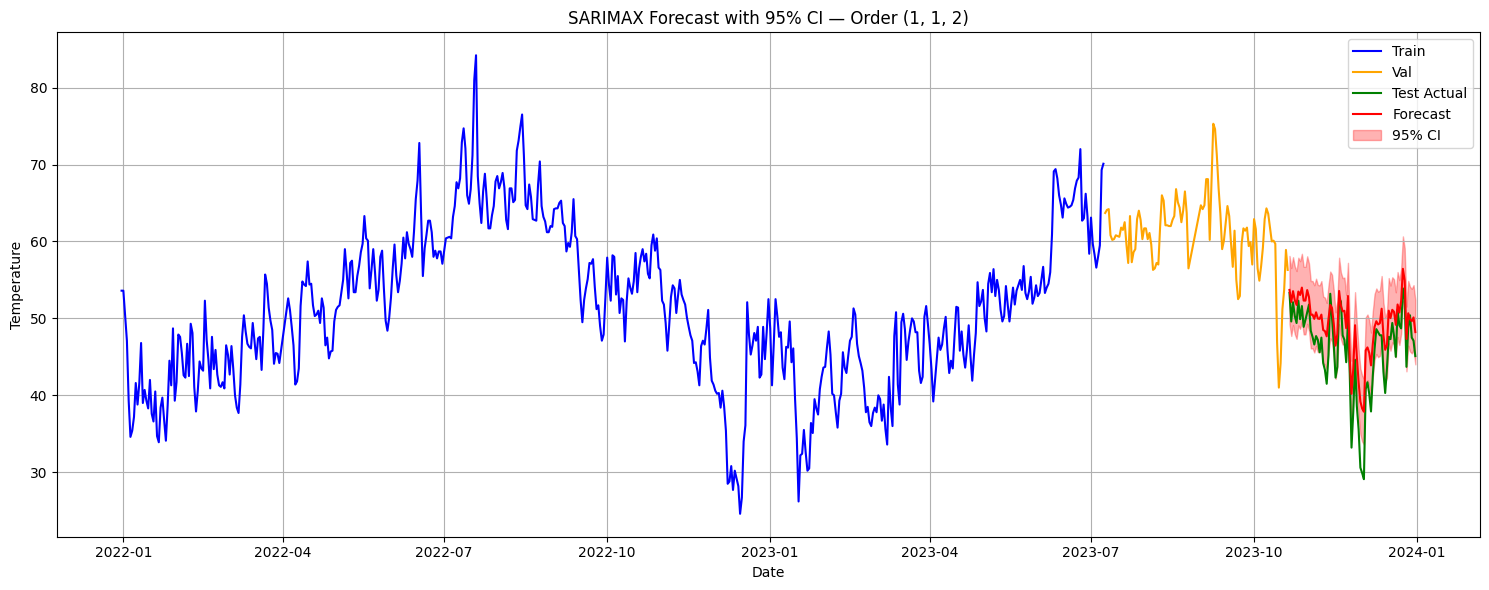

Madryd model selection:   0%|                                                                   | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Madryd model selection:   4%|██▏                                                        | 1/27 [00:00<00:08,  3.08it/s]

1
Order: (0, 0, 0), AICc: 5095.04, ADF p-value: 0.1031, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 0, 1)
2


Madryd model selection:   7%|████▎                                                      | 2/27 [00:00<00:06,  3.77it/s]

1
Order: (0, 0, 1), AICc: 4498.82, ADF p-value: 0.0997, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 0, 2)
2


Madryd model selection:  15%|████████▋                                                  | 4/27 [00:00<00:05,  4.39it/s]

1
Order: (0, 0, 2), AICc: 4223.54, ADF p-value: 0.1386, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 1, 0)
2
1
Order: (0, 1, 0), AICc: 3374.05, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3374.05
(0, 1, 1)
2


Madryd model selection:  19%|██████████▉                                                | 5/27 [00:01<00:04,  4.75it/s]

1
Order: (0, 1, 1), AICc: 3371.65, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3371.65
(0, 1, 2)
2
1
Order: (0, 1, 2), AICc: 3345.93, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93


Madryd model selection:  22%|█████████████                                              | 6/27 [00:01<00:04,  5.09it/s]

(0, 2, 0)
2


Madryd model selection:  26%|███████████████▎                                           | 7/27 [00:01<00:04,  4.81it/s]

1
Order: (0, 2, 0), AICc: 3810.48, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(0, 2, 1)
2


Madryd model selection:  30%|█████████████████▍                                         | 8/27 [00:01<00:04,  4.23it/s]

1
Order: (0, 2, 1), AICc: 3373.02, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(0, 2, 2)
2


Madryd model selection:  33%|███████████████████▋                                       | 9/27 [00:02<00:05,  3.03it/s]

1
Order: (0, 2, 2), AICc: 3370.80, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(1, 0, 0)
2


Madryd model selection:  37%|█████████████████████▍                                    | 10/27 [00:02<00:05,  3.11it/s]

1
Order: (1, 0, 0), AICc: 3379.75, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(1, 0, 1)
2


Madryd model selection:  41%|███████████████████████▋                                  | 11/27 [00:03<00:05,  2.81it/s]

1
Order: (1, 0, 1), AICc: 3377.52, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(1, 0, 2)
2


Madryd model selection:  48%|███████████████████████████▉                              | 13/27 [00:03<00:04,  2.95it/s]

1
Order: (1, 0, 2), AICc: 3352.60, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3376.00, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(1, 1, 1)
2


Madryd model selection:  52%|██████████████████████████████                            | 14/27 [00:04<00:04,  2.95it/s]

1
Order: (1, 1, 1), AICc: 3349.29, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3345.93
(1, 1, 2)
2


Madryd model selection:  56%|████████████████████████████████▏                         | 15/27 [00:04<00:04,  2.99it/s]

1
Order: (1, 1, 2), AICc: 3331.21, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(1, 2, 0)
2
1
Order: (1, 2, 0), AICc: 3695.81, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21


Madryd model selection:  59%|██████████████████████████████████▎                       | 16/27 [00:04<00:03,  3.47it/s]

(1, 2, 1)
2


Madryd model selection:  63%|████████████████████████████████████▌                     | 17/27 [00:05<00:03,  2.89it/s]

1
Order: (1, 2, 1), AICc: 3375.06, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(1, 2, 2)
2


Madryd model selection:  67%|██████████████████████████████████████▋                   | 18/27 [00:05<00:04,  2.24it/s]

1
Order: (1, 2, 2), AICc: 3368.84, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 0, 0)
2


Madryd model selection:  70%|████████████████████████████████████████▊                 | 19/27 [00:06<00:03,  2.22it/s]

1
Order: (2, 0, 0), AICc: 3377.58, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 0, 1)
2


Madryd model selection:  74%|██████████████████████████████████████████▉               | 20/27 [00:06<00:03,  2.03it/s]

1
Order: (2, 0, 1), AICc: 3549.70, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 0, 2)
2


Madryd model selection:  78%|█████████████████████████████████████████████             | 21/27 [00:07<00:03,  1.84it/s]

1
Order: (2, 0, 2), AICc: 3338.69, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 1, 0)
2


Madryd model selection:  81%|███████████████████████████████████████████████▎          | 22/27 [00:07<00:02,  2.24it/s]

1
Order: (2, 1, 0), AICc: 3355.02, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 1, 1)
2


Madryd model selection:  85%|█████████████████████████████████████████████████▍        | 23/27 [00:08<00:01,  2.52it/s]

1
Order: (2, 1, 1), AICc: 3335.71, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 1, 2)
2


Madryd model selection:  89%|███████████████████████████████████████████████████▌      | 24/27 [00:08<00:01,  2.12it/s]

1
Order: (2, 1, 2), AICc: 3333.00, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 2, 0)
2


Madryd model selection:  93%|█████████████████████████████████████████████████████▋    | 25/27 [00:08<00:00,  2.49it/s]

1
Order: (2, 2, 0), AICc: 3607.15, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 2, 1)
2


Madryd model selection:  96%|███████████████████████████████████████████████████████▊  | 26/27 [00:09<00:00,  2.39it/s]

1
Order: (2, 2, 1), AICc: 3359.43, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21
(2, 2, 2)
2


Madryd model selection: 100%|██████████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.66it/s]


1
Order: (2, 2, 2), AICc: 3336.45, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3331.21


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:21,  3.29it/s]

56.84418113471926
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:23,  3.01it/s]

57.16715138817983
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:00<00:23,  3.02it/s]

59.097220624308875
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:21,  3.27it/s]

60.75379985784121
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:01<00:22,  2.98it/s]

60.1257459276806
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:01<00:22,  3.00it/s]

62.14833183493873
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:02<00:20,  3.26it/s]

62.47077017817846
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:02<00:20,  3.17it/s]

60.624302400465396
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:02<00:20,  3.07it/s]

61.19734856503432
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:03<00:19,  3.15it/s]

61.6304267640063
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:03<00:19,  3.19it/s]

60.356623087134395
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:03<00:19,  3.07it/s]

59.663081812355436
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:04<00:18,  3.30it/s]

60.99623026795676
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:04<00:16,  3.50it/s]

60.022173693887396
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:04<00:17,  3.28it/s]

59.22142439365415
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:05<00:17,  3.18it/s]

60.956410329595734
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:05<00:17,  3.15it/s]

59.35920481809927
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:05<00:17,  3.08it/s]

57.897130293141586
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:06<00:18,  2.98it/s]

57.91181655449001
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:06<00:18,  2.92it/s]

58.57593007465846
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:06<00:17,  2.95it/s]

59.740732692310324
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:07<00:17,  2.85it/s]

59.2066686689232
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:07<00:17,  2.81it/s]

62.29815404060058
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:07<00:17,  2.82it/s]

61.96870036579729
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:08<00:16,  2.84it/s]

62.467167621348054
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:08<00:16,  2.84it/s]

61.18361314470391
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:08<00:16,  2.80it/s]

60.99303884735693
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:09<00:16,  2.81it/s]

60.877802337963054
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:09<00:15,  2.83it/s]

61.336218837757926
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:10<00:15,  2.78it/s]

60.18423355878912
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:10<00:15,  2.75it/s]

59.87224579037867
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:10<00:14,  2.75it/s]

59.838667189775144
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:11<00:14,  2.78it/s]

57.884706277835214
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:11<00:13,  2.85it/s]

57.61254346182554
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:11<00:13,  2.79it/s]

55.46230265933541
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:12<00:13,  2.75it/s]

56.756481137571754
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:12<00:13,  2.77it/s]

57.52076132958234
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:12<00:13,  2.69it/s]

57.56261898497799
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:13<00:12,  2.72it/s]

58.45108601827787
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:13<00:12,  2.73it/s]

59.84931491851994
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:14<00:11,  2.73it/s]

61.32951749625459
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:14<00:11,  2.71it/s]

61.97453924171311
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:14<00:11,  2.71it/s]

58.31337645565895
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:15<00:10,  2.66it/s]

56.840174653998645
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:15<00:10,  2.64it/s]

56.739566383010015
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:15<00:10,  2.60it/s]

58.57676288092152
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:16<00:09,  2.60it/s]

56.88614944998699
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:16<00:09,  2.63it/s]

57.19377713085008
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:17<00:09,  2.60it/s]

57.46232968474985
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:17<00:08,  2.60it/s]

58.19531422264831
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:17<00:08,  2.61it/s]

59.198328672762656
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:18<00:08,  2.59it/s]

60.75800930543049
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:18<00:07,  2.59it/s]

60.39154788597341
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:19<00:07,  2.51it/s]

60.16961846270894
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:19<00:07,  2.53it/s]

58.26359698915964
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:19<00:06,  2.55it/s]

56.785447633840896
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:20<00:06,  2.54it/s]

57.683850947144265
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:20<00:05,  2.51it/s]

56.377182361498654
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:21<00:05,  2.51it/s]

56.25990709559484
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:21<00:05,  2.51it/s]

56.042151058397835
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:21<00:04,  2.54it/s]

56.21599181112341
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:22<00:04,  2.55it/s]

56.49468781219472
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:22<00:03,  2.54it/s]

56.921693822378856
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:22<00:03,  2.55it/s]

56.95518828182627
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:23<00:03,  2.54it/s]

56.48610853898042
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:23<00:02,  2.53it/s]

56.24109646413762
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:24<00:02,  2.55it/s]

56.084035832195454
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:24<00:01,  2.54it/s]

55.581455849344394
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:24<00:01,  2.53it/s]

55.64857859917841
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:25<00:01,  2.56it/s]

55.90829478334101
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:25<00:00,  2.58it/s]

56.825451952760645
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:26<00:00,  2.56it/s]

56.84434568183184
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:26<00:00,  2.75it/s]

58.51117650186915
False
False


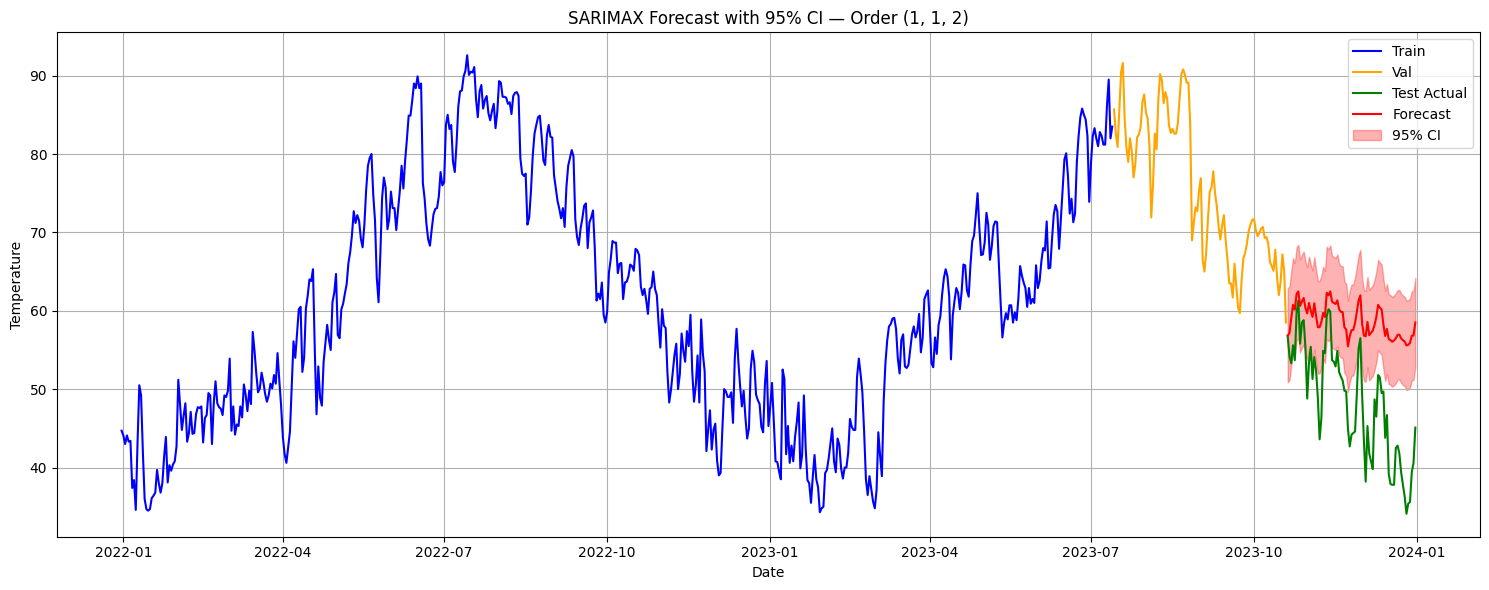

Moskwa model selection:   4%|██▏                                                        | 1/27 [00:00<00:03,  7.28it/s]

(0, 0, 0)
2
1
Order: (0, 0, 0), AICc: 1706.80, ADF p-value: 0.0199, Best_Order: (0, 0, 0), Best_aicc: 1706.80
(0, 0, 1)
2


Moskwa model selection:   7%|████▎                                                      | 2/27 [00:00<00:04,  5.34it/s]

1
Order: (0, 0, 1), AICc: 1515.47, ADF p-value: 0.0343, Best_Order: (0, 0, 1), Best_aicc: 1515.47
(0, 0, 2)
2


Moskwa model selection:  15%|████████▋                                                  | 4/27 [00:00<00:04,  5.34it/s]

1
Order: (0, 0, 2), AICc: 1484.24, ADF p-value: 0.0768, Best_Order: (0, 0, 1), Best_aicc: 1515.47
(0, 1, 0)
2
1
Order: (0, 1, 0), AICc: 1310.84, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 1310.84
(0, 1, 1)
2


Moskwa model selection:  19%|██████████▉                                                | 5/27 [00:00<00:04,  4.91it/s]

1
Order: (0, 1, 1), AICc: 1295.58, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 1295.58
(0, 1, 2)
2


Moskwa model selection:  26%|███████████████▎                                           | 7/27 [00:01<00:03,  5.22it/s]

1
Order: (0, 1, 2), AICc: 1267.18, ADF p-value: 0.0023, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(0, 2, 0)
2
1
Order: (0, 2, 0), AICc: 1524.30, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(0, 2, 1)
2


Moskwa model selection:  30%|█████████████████▍                                         | 8/27 [00:01<00:03,  5.29it/s]

1
Order: (0, 2, 1), AICc: 1309.60, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(0, 2, 2)
2


Moskwa model selection:  33%|███████████████████▋                                       | 9/27 [00:01<00:03,  4.57it/s]

1
Order: (0, 2, 2), AICc: 1294.81, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 0, 0)
2
1
Order: (1, 0, 0), AICc: 1318.21, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18


Moskwa model selection:  37%|█████████████████████▍                                    | 10/27 [00:02<00:03,  4.69it/s]

(1, 0, 1)
2


Moskwa model selection:  41%|███████████████████████▋                                  | 11/27 [00:02<00:03,  4.44it/s]

1
Order: (1, 0, 1), AICc: 1303.80, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 0, 2)
2


Moskwa model selection:  48%|███████████████████████████▉                              | 13/27 [00:02<00:02,  4.81it/s]

1
Order: (1, 0, 2), AICc: 1277.42, ADF p-value: 0.0036, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 1306.65, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 1, 1)
2


Moskwa model selection:  52%|██████████████████████████████                            | 14/27 [00:02<00:02,  4.57it/s]

1
Order: (1, 1, 1), AICc: 1277.40, ADF p-value: 0.0007, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 1, 2)
2


Moskwa model selection:  59%|██████████████████████████████████▎                       | 16/27 [00:03<00:02,  4.97it/s]

1
Order: (1, 1, 2), AICc: 1267.32, ADF p-value: 0.0011, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 2, 0)
2
1
Order: (1, 2, 0), AICc: 1462.77, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 2, 1)
2


Moskwa model selection:  63%|████████████████████████████████████▌                     | 17/27 [00:03<00:02,  4.40it/s]

1
Order: (1, 2, 1), AICc: 1305.84, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(1, 2, 2)
2


Moskwa model selection:  67%|██████████████████████████████████████▋                   | 18/27 [00:03<00:02,  4.05it/s]

1
Order: (1, 2, 2), AICc: 1303.74, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(2, 0, 0)
2


Moskwa model selection:  70%|████████████████████████████████████████▊                 | 19/27 [00:04<00:01,  4.11it/s]

1
Order: (2, 0, 0), AICc: 1311.87, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(2, 0, 1)
2


Moskwa model selection:  74%|██████████████████████████████████████████▉               | 20/27 [00:04<00:01,  3.75it/s]

1
Order: (2, 0, 1), AICc: 1304.40, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(2, 0, 2)
2


Moskwa model selection:  81%|███████████████████████████████████████████████▎          | 22/27 [00:04<00:01,  4.16it/s]

1
Order: (2, 0, 2), AICc: 1278.56, ADF p-value: 0.0022, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(2, 1, 0)
2
1
Order: (2, 1, 0), AICc: 1286.50, ADF p-value: 0.0001, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(2, 1, 1)
2


Moskwa model selection:  85%|█████████████████████████████████████████████████▍        | 23/27 [00:05<00:01,  3.77it/s]

1
Order: (2, 1, 1), AICc: 1277.30, ADF p-value: 0.0004, Best_Order: (0, 1, 2), Best_aicc: 1267.18
(2, 1, 2)
2


Moskwa model selection:  89%|███████████████████████████████████████████████████▌      | 24/27 [00:05<00:00,  3.55it/s]

1
Order: (2, 1, 2), AICc: 1264.30, ADF p-value: 0.0037, Best_Order: (2, 1, 2), Best_aicc: 1264.30
(2, 2, 0)
2
1
Order: (2, 2, 0), AICc: 1390.33, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 1264.30


Moskwa model selection:  93%|█████████████████████████████████████████████████████▋    | 25/27 [00:05<00:00,  3.91it/s]

(2, 2, 1)
2


Moskwa model selection:  96%|███████████████████████████████████████████████████████▊  | 26/27 [00:06<00:00,  3.53it/s]

1
Order: (2, 2, 1), AICc: 1290.55, ADF p-value: 0.0002, Best_Order: (2, 1, 2), Best_aicc: 1264.30
(2, 2, 2)
2


Moskwa model selection: 100%|██████████████████████████████████████████████████████████| 27/27 [00:06<00:00,  4.16it/s]


1
Order: (2, 2, 2), AICc: 1284.15, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 1264.30


Analysed test_samples from:   0%|                                                               | 0/29 [00:00<?, ?it/s]

1


Analysed test_samples from:   3%|█▉                                                     | 1/29 [00:00<00:07,  3.51it/s]

71.18240566066339
1


Analysed test_samples from:   7%|███▊                                                   | 2/29 [00:00<00:07,  3.43it/s]

67.87308804432368
1


Analysed test_samples from:  10%|█████▋                                                 | 3/29 [00:00<00:07,  3.39it/s]

72.74953326462177
1


Analysed test_samples from:  14%|███████▌                                               | 4/29 [00:01<00:07,  3.26it/s]

65.67984875850792
1


Analysed test_samples from:  17%|█████████▍                                             | 5/29 [00:01<00:07,  3.30it/s]

64.42972463327679
1


Analysed test_samples from:  21%|███████████▍                                           | 6/29 [00:01<00:08,  2.85it/s]

61.885643418205646
1
62.03212734138276


Analysed test_samples from:  28%|███████████████▏                                       | 8/29 [00:02<00:05,  3.77it/s]

1
59.33133416779293
1


Analysed test_samples from:  31%|█████████████████                                      | 9/29 [00:02<00:04,  4.14it/s]

67.89796853476662
1


Analysed test_samples from:  34%|██████████████████▌                                   | 10/29 [00:02<00:04,  3.83it/s]

66.9392621640329
1


Analysed test_samples from:  38%|████████████████████▍                                 | 11/29 [00:03<00:04,  3.81it/s]

62.74877282124183
1


Analysed test_samples from:  41%|██████████████████████▎                               | 12/29 [00:03<00:04,  3.83it/s]

65.83984872557342
1


Analysed test_samples from:  45%|████████████████████████▏                             | 13/29 [00:03<00:04,  3.67it/s]

70.76848351523398
1


Analysed test_samples from:  48%|██████████████████████████                            | 14/29 [00:03<00:04,  3.60it/s]

70.48743080762776
1


Analysed test_samples from:  52%|███████████████████████████▉                          | 15/29 [00:04<00:04,  3.46it/s]

66.240860397198
1


Analysed test_samples from:  55%|█████████████████████████████▊                        | 16/29 [00:04<00:04,  2.95it/s]

57.590116875342176
1


Analysed test_samples from:  62%|█████████████████████████████████▌                    | 18/29 [00:05<00:03,  3.15it/s]

53.296666680057086
1
54.1855151157625
1


Analysed test_samples from:  66%|███████████████████████████████████▍                  | 19/29 [00:05<00:03,  3.21it/s]

52.75678947228517
1


Analysed test_samples from:  69%|█████████████████████████████████████▏                | 20/29 [00:05<00:02,  3.23it/s]

49.74949739582817
1


Analysed test_samples from:  72%|███████████████████████████████████████               | 21/29 [00:06<00:02,  3.31it/s]

56.829466298528864
1


Analysed test_samples from:  76%|████████████████████████████████████████▉             | 22/29 [00:06<00:02,  2.96it/s]

26.862423767446607
1


Analysed test_samples from:  79%|██████████████████████████████████████████▊           | 23/29 [00:06<00:01,  3.04it/s]

31.195937694899754
1


Analysed test_samples from:  83%|████████████████████████████████████████████▋         | 24/29 [00:07<00:01,  3.17it/s]

31.48386798577277
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 25/29 [00:07<00:01,  3.36it/s]

45.85482495189922
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▍     | 26/29 [00:07<00:00,  3.05it/s]

38.028273760415296
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 27/29 [00:08<00:00,  3.13it/s]

36.74738064284894
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▏ | 28/29 [00:08<00:00,  3.35it/s]

28.459344895305797
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.33it/s]

40.276240074417274
False
False


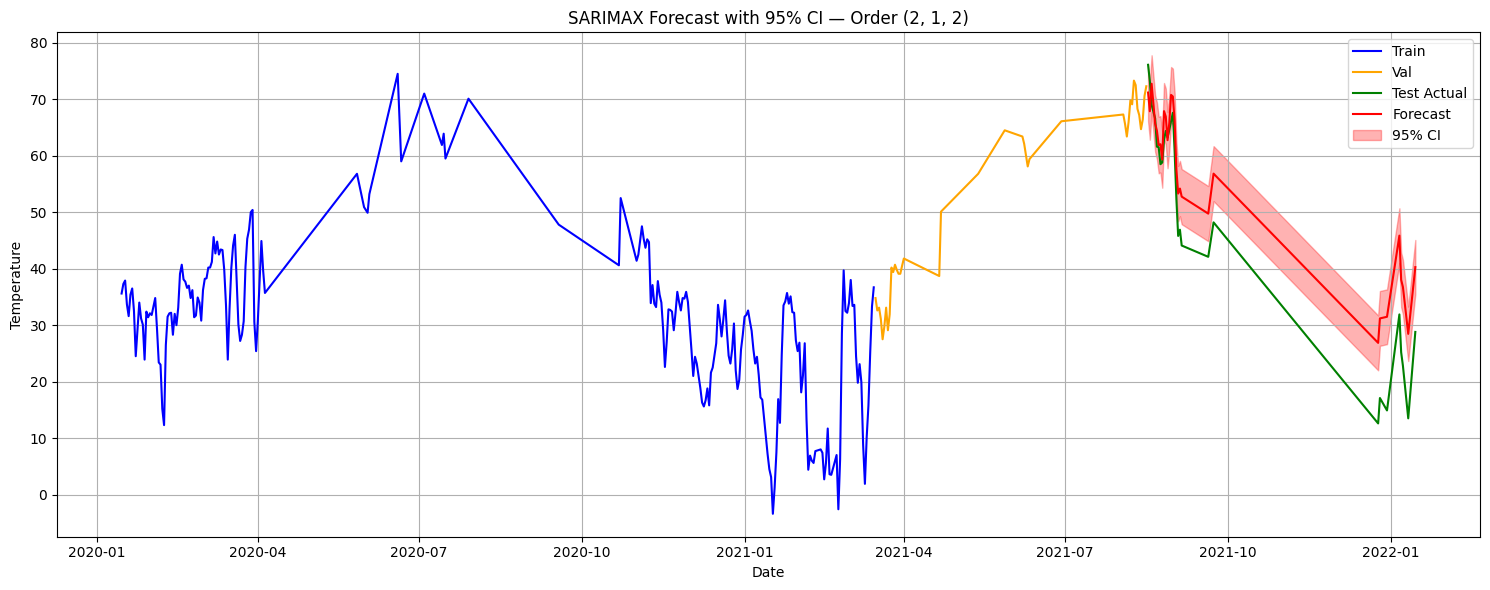

Paryż model selection:   0%|                                                                    | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Paryż model selection:   4%|██▏                                                         | 1/27 [00:00<00:07,  3.25it/s]

1
Order: (0, 0, 0), AICc: 4085.56, ADF p-value: 0.0793, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 0, 1)
2


Paryż model selection:   7%|████▍                                                       | 2/27 [00:00<00:06,  3.80it/s]

1
Order: (0, 0, 1), AICc: 3714.64, ADF p-value: 0.0523, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 0, 2)
2


Paryż model selection:  11%|██████▋                                                     | 3/27 [00:00<00:06,  3.56it/s]

1
Order: (0, 0, 2), AICc: 3565.38, ADF p-value: 0.0879, Best_Order: (0, 0, 0), Best_aicc: inf
(0, 1, 0)
2


Paryż model selection:  15%|████████▉                                                   | 4/27 [00:01<00:05,  3.89it/s]

1
Order: (0, 1, 0), AICc: 3321.62, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3321.62
(0, 1, 1)
2
1
Order: (0, 1, 1), AICc: 3310.77, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3310.77


Paryż model selection:  19%|███████████                                                 | 5/27 [00:01<00:04,  4.48it/s]

(0, 1, 2)
2
1


Paryż model selection:  22%|█████████████▎                                              | 6/27 [00:01<00:04,  4.52it/s]

Order: (0, 1, 2), AICc: 3255.19, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(0, 2, 0)
2


Paryż model selection:  26%|███████████████▌                                            | 7/27 [00:01<00:04,  4.45it/s]

1
Order: (0, 2, 0), AICc: 3810.11, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(0, 2, 1)
2


Paryż model selection:  30%|█████████████████▊                                          | 8/27 [00:02<00:05,  3.50it/s]

1
Order: (0, 2, 1), AICc: 3321.69, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(0, 2, 2)
2


Paryż model selection:  33%|████████████████████                                        | 9/27 [00:02<00:06,  2.71it/s]

1
Order: (0, 2, 2), AICc: 3310.21, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(1, 0, 0)
2


Paryż model selection:  37%|█████████████████████▊                                     | 10/27 [00:02<00:05,  2.93it/s]

1
Order: (1, 0, 0), AICc: 3327.17, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(1, 0, 1)
2


Paryż model selection:  41%|████████████████████████                                   | 11/27 [00:03<00:06,  2.61it/s]

1
Order: (1, 0, 1), AICc: 3315.27, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(1, 0, 2)
2


Paryż model selection:  48%|████████████████████████████▍                              | 13/27 [00:04<00:04,  2.85it/s]

1
Order: (1, 0, 2), AICc: 3278.54, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3319.76, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(1, 1, 1)
2


Paryż model selection:  52%|██████████████████████████████▌                            | 14/27 [00:04<00:04,  2.99it/s]

1
Order: (1, 1, 1), AICc: 3255.50, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3255.19
(1, 1, 2)
2


Paryż model selection:  56%|████████████████████████████████▊                          | 15/27 [00:04<00:04,  2.93it/s]

1
Order: (1, 1, 2), AICc: 3243.38, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(1, 2, 0)
2
1


Paryż model selection:  59%|██████████████████████████████████▉                        | 16/27 [00:04<00:03,  3.34it/s]

Order: (1, 2, 0), AICc: 3691.84, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(1, 2, 1)
2


Paryż model selection:  63%|█████████████████████████████████████▏                     | 17/27 [00:05<00:03,  3.05it/s]

1
Order: (1, 2, 1), AICc: 3319.52, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(1, 2, 2)
2


Paryż model selection:  67%|███████████████████████████████████████▎                   | 18/27 [00:05<00:03,  2.41it/s]

1
Order: (1, 2, 2), AICc: 3320.39, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 0, 0)
2


Paryż model selection:  70%|█████████████████████████████████████████▌                 | 19/27 [00:06<00:03,  2.40it/s]

1
Order: (2, 0, 0), AICc: 3319.81, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 0, 1)
2


Paryż model selection:  74%|███████████████████████████████████████████▋               | 20/27 [00:07<00:03,  2.04it/s]

1
Order: (2, 0, 1), AICc: 3350.31, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 0, 2)
2


Paryż model selection:  78%|█████████████████████████████████████████████▉             | 21/27 [00:07<00:03,  1.87it/s]

1
Order: (2, 0, 2), AICc: 3294.69, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 1, 0)
2


Paryż model selection:  81%|████████████████████████████████████████████████           | 22/27 [00:07<00:02,  2.27it/s]

1
Order: (2, 1, 0), AICc: 3275.46, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 1, 1)
2


Paryż model selection:  85%|██████████████████████████████████████████████████▎        | 23/27 [00:08<00:01,  2.39it/s]

1
Order: (2, 1, 1), AICc: 3250.18, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 1, 2)
2


Paryż model selection:  89%|████████████████████████████████████████████████████▍      | 24/27 [00:08<00:01,  2.31it/s]

1
Order: (2, 1, 2), AICc: 3244.84, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 2, 0)
2


Paryż model selection:  93%|██████████████████████████████████████████████████████▋    | 25/27 [00:08<00:00,  2.70it/s]

1
Order: (2, 2, 0), AICc: 3570.80, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 2, 1)
2


Paryż model selection:  96%|████████████████████████████████████████████████████████▊  | 26/27 [00:09<00:00,  2.40it/s]

1
Order: (2, 2, 1), AICc: 3280.02, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38
(2, 2, 2)
2


Paryż model selection: 100%|███████████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.63it/s]


1
Order: (2, 2, 2), AICc: 3253.56, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3243.38


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:23,  3.02it/s]

61.47314607721131
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:22,  3.20it/s]

59.37122706610978
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:00<00:21,  3.26it/s]

59.57556375891001
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:20,  3.43it/s]

57.85456104979216
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:01<00:19,  3.45it/s]

58.57114000977831
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:01<00:19,  3.43it/s]

59.68496235390461
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:02<00:18,  3.50it/s]

58.11385099625953
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:02<00:18,  3.47it/s]

59.54910711588671
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:02<00:18,  3.55it/s]

60.05973587768145
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:02<00:17,  3.55it/s]

59.65100903118713
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:03<00:17,  3.56it/s]

58.34824261453546
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:03<00:17,  3.53it/s]

59.71294921412107
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:03<00:16,  3.54it/s]

60.416479070953116
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:04<00:17,  3.46it/s]

56.39383192904149
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:04<00:16,  3.46it/s]

56.35777653408947
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:04<00:16,  3.53it/s]

56.752340912013025
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:04<00:15,  3.52it/s]

57.47056855412603
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:05<00:15,  3.53it/s]

58.12084236330804
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:05<00:15,  3.55it/s]

57.10130136484926
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:05<00:15,  3.50it/s]

58.047119136905636
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:06<00:14,  3.47it/s]

57.34921825095911
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:06<00:14,  3.46it/s]

56.20151514248222
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:06<00:14,  3.49it/s]

55.77539227366583
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:06<00:14,  3.45it/s]

54.975831260389796
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:07<00:13,  3.44it/s]

61.05578959231484
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:07<00:13,  3.42it/s]

59.6442659348958
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:07<00:13,  3.35it/s]

58.25580805988456
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:08<00:13,  3.40it/s]

54.64395934124299
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:08<00:12,  3.44it/s]

56.27822350032338
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:08<00:12,  3.48it/s]

58.09728033560655
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:08<00:11,  3.51it/s]

59.6086100437044
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:09<00:11,  3.58it/s]

57.842454922042315
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:09<00:11,  3.57it/s]

58.398655792368345
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:09<00:10,  3.59it/s]

53.3027844156787
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:10<00:10,  3.47it/s]

57.857356070503016
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:10<00:10,  3.37it/s]

55.152163644475635
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:10<00:10,  3.31it/s]

51.653922997909085
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:11<00:10,  3.31it/s]

51.70665326238125
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:11<00:10,  3.29it/s]

52.82897906760032
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:11<00:09,  3.32it/s]

52.305460120212345
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:11<00:09,  3.35it/s]

52.70076108574168
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:12<00:09,  3.34it/s]

51.6020494370417
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:12<00:09,  3.32it/s]

46.4320522975593
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:12<00:08,  3.33it/s]

44.3606659600579
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:13<00:08,  3.30it/s]

45.838866343539166
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:13<00:08,  3.37it/s]

52.70191677284376
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:13<00:07,  3.37it/s]

54.69473670886483
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:14<00:07,  3.29it/s]

52.97670794991379
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:14<00:07,  3.26it/s]

50.93725168282195
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:14<00:07,  3.24it/s]

54.25857432858504
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:14<00:06,  3.24it/s]

54.60237244814358
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:15<00:06,  3.31it/s]

56.703497906110094
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:15<00:05,  3.34it/s]

58.202913098882775
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:15<00:05,  3.35it/s]

58.85553404630832
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:16<00:05,  3.38it/s]

56.79942868446271
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:16<00:05,  3.34it/s]

55.711252378268085
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:16<00:04,  3.33it/s]

55.55257388178002
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:17<00:04,  3.33it/s]

53.2984253437562
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:17<00:04,  3.32it/s]

46.67938026896452
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:17<00:03,  3.36it/s]

47.53054149655809
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:17<00:03,  3.32it/s]

53.10397305904415
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:18<00:03,  3.15it/s]

56.58415728157573
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:18<00:03,  3.11it/s]

57.48088811837981
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:18<00:03,  2.97it/s]

57.586187849726336
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:19<00:02,  3.07it/s]

57.95494585964413
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:19<00:02,  2.93it/s]

58.102754257703396
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:20<00:02,  2.89it/s]

59.07990652307736
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:20<00:01,  2.97it/s]

57.473061219356126
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:20<00:01,  2.97it/s]

55.78413566742749
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:20<00:00,  3.08it/s]

58.78916213926437
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:21<00:00,  3.14it/s]

58.698240967903956
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:21<00:00,  3.18it/s]

57.945053286398156
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:21<00:00,  3.33it/s]

55.728440492325696
False
False


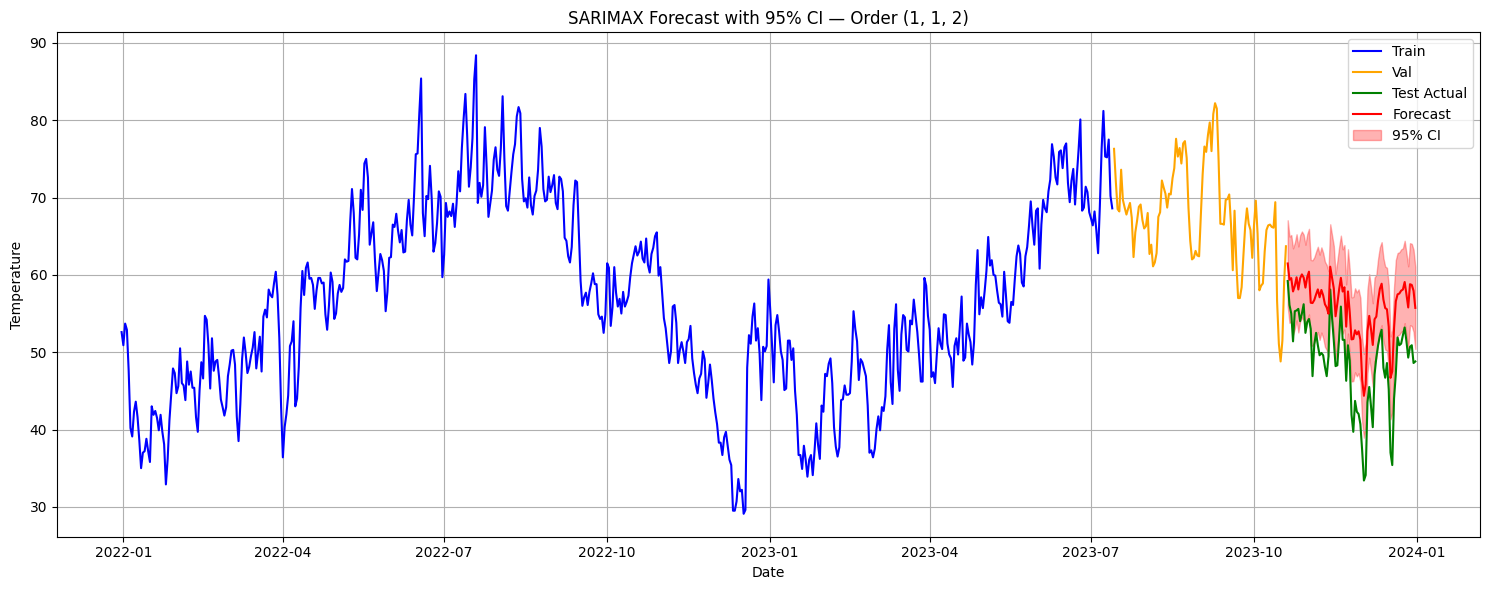

Praga model selection:   0%|                                                                    | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Praga model selection:   4%|██▏                                                         | 1/27 [00:00<00:06,  4.05it/s]

1
Order: (0, 0, 0), AICc: 4023.48, ADF p-value: 0.0057, Best_Order: (0, 0, 0), Best_aicc: 4023.48
(0, 0, 1)
2


Praga model selection:   7%|████▍                                                       | 2/27 [00:00<00:06,  3.66it/s]

1
Order: (0, 0, 1), AICc: 3730.51, ADF p-value: 0.0458, Best_Order: (0, 0, 1), Best_aicc: 3730.51
(0, 0, 2)
2


Praga model selection:  11%|██████▋                                                     | 3/27 [00:00<00:07,  3.32it/s]

1
Order: (0, 0, 2), AICc: 3651.67, ADF p-value: 0.0037, Best_Order: (0, 0, 2), Best_aicc: 3651.67
(0, 1, 0)
2


Praga model selection:  15%|████████▉                                                   | 4/27 [00:01<00:06,  3.58it/s]

1
Order: (0, 1, 0), AICc: 3432.74, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3432.74
(0, 1, 1)
2
1
Order: (0, 1, 1), AICc: 3393.72, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3393.72


Praga model selection:  19%|███████████                                                 | 5/27 [00:01<00:05,  4.18it/s]

(0, 1, 2)
2


Praga model selection:  22%|█████████████▎                                              | 6/27 [00:01<00:05,  4.00it/s]

1
Order: (0, 1, 2), AICc: 3352.52, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(0, 2, 0)
2


Praga model selection:  26%|███████████████▌                                            | 7/27 [00:01<00:04,  4.22it/s]

1
Order: (0, 2, 0), AICc: 3947.67, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(0, 2, 1)
2


Praga model selection:  30%|█████████████████▊                                          | 8/27 [00:02<00:05,  3.32it/s]

1
Order: (0, 2, 1), AICc: 3431.92, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(0, 2, 2)
2


Praga model selection:  33%|████████████████████                                        | 9/27 [00:02<00:07,  2.55it/s]

1
Order: (0, 2, 2), AICc: 3393.26, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(1, 0, 0)
2


Praga model selection:  37%|█████████████████████▊                                     | 10/27 [00:03<00:06,  2.76it/s]

1
Order: (1, 0, 0), AICc: 3436.75, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(1, 0, 1)
2


Praga model selection:  41%|████████████████████████                                   | 11/27 [00:03<00:06,  2.50it/s]

1
Order: (1, 0, 1), AICc: 3399.29, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(1, 0, 2)
2


Praga model selection:  48%|████████████████████████████▍                              | 13/27 [00:04<00:05,  2.80it/s]

1
Order: (1, 0, 2), AICc: 3358.76, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3418.12, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3352.52
(1, 1, 1)
2


Praga model selection:  52%|██████████████████████████████▌                            | 14/27 [00:04<00:04,  2.91it/s]

1
Order: (1, 1, 1), AICc: 3350.67, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 3350.67
(1, 1, 2)
2


Praga model selection:  56%|████████████████████████████████▊                          | 15/27 [00:04<00:04,  2.88it/s]

1
Order: (1, 1, 2), AICc: 3347.47, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(1, 2, 0)
2
1


Praga model selection:  59%|██████████████████████████████████▉                        | 16/27 [00:05<00:03,  3.30it/s]

Order: (1, 2, 0), AICc: 3801.00, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(1, 2, 1)
2


Praga model selection:  63%|█████████████████████████████████████▏                     | 17/27 [00:05<00:03,  2.74it/s]

1
Order: (1, 2, 1), AICc: 3417.41, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(1, 2, 2)
2


Praga model selection:  67%|███████████████████████████████████████▎                   | 18/27 [00:06<00:04,  2.17it/s]

1
Order: (1, 2, 2), AICc: 3352.15, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 0, 0)
2


Praga model selection:  70%|█████████████████████████████████████████▌                 | 19/27 [00:06<00:03,  2.15it/s]

1
Order: (2, 0, 0), AICc: 3418.03, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 0, 1)
2


Praga model selection:  74%|███████████████████████████████████████████▋               | 20/27 [00:07<00:03,  2.07it/s]

1
Order: (2, 0, 1), AICc: 3365.36, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 0, 2)
2


Praga model selection:  78%|█████████████████████████████████████████████▉             | 21/27 [00:07<00:03,  1.89it/s]

1
Order: (2, 0, 2), AICc: 3358.93, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 1, 0)
2


Praga model selection:  81%|████████████████████████████████████████████████           | 22/27 [00:08<00:02,  2.24it/s]

1
Order: (2, 1, 0), AICc: 3382.31, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 1, 1)
2


Praga model selection:  85%|██████████████████████████████████████████████████▎        | 23/27 [00:08<00:01,  2.40it/s]

1
Order: (2, 1, 1), AICc: 3352.53, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 1, 2)
2


Praga model selection:  89%|████████████████████████████████████████████████████▍      | 24/27 [00:09<00:01,  2.27it/s]

1
Order: (2, 1, 2), AICc: 3348.48, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 2, 0)
2


Praga model selection:  93%|██████████████████████████████████████████████████████▋    | 25/27 [00:09<00:00,  2.63it/s]

1
Order: (2, 2, 0), AICc: 3676.88, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 2, 1)
2


Praga model selection:  96%|████████████████████████████████████████████████████████▊  | 26/27 [00:09<00:00,  2.21it/s]

1
Order: (2, 2, 1), AICc: 3386.71, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47
(2, 2, 2)
2


Praga model selection: 100%|███████████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.53it/s]


1
Order: (2, 2, 2), AICc: 3355.86, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3347.47


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:24,  2.97it/s]

49.00555036304587
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:25,  2.84it/s]

52.52454547440489
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:01<00:25,  2.79it/s]

51.116360452495854
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:24,  2.87it/s]

50.39444379929054
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:01<00:23,  2.89it/s]

52.011898941346075
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:02<00:22,  3.04it/s]

50.9479316354393
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:02<00:22,  2.93it/s]

52.01327658978862
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:02<00:21,  3.05it/s]

51.29950721011723
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:03<00:21,  2.99it/s]

50.94257557289532
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:03<00:21,  2.87it/s]

50.9537679346203
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:03<00:21,  2.93it/s]

52.59643095821044
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:04<00:21,  2.88it/s]

51.79088694145406
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:04<00:20,  2.89it/s]

51.296582296081546
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:04<00:20,  2.95it/s]

50.18030426814833
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:05<00:20,  2.88it/s]

48.711315564525876
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:05<00:19,  2.96it/s]

46.39220620748705
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:05<00:18,  3.01it/s]

48.938263130194514
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:06<00:18,  2.92it/s]

49.985445309421976
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:06<00:18,  2.92it/s]

48.421004515848956
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:06<00:18,  2.89it/s]

46.73448317849832
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:07<00:17,  2.91it/s]

45.04607800460027
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:07<00:18,  2.74it/s]

46.60987998978342
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:07<00:18,  2.73it/s]

45.49543456970162
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:08<00:18,  2.64it/s]

44.35072970576405
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:08<00:17,  2.74it/s]

47.001999189736104
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:09<00:16,  2.83it/s]

49.08302229837311
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:09<00:16,  2.86it/s]

49.12173282550087
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:09<00:15,  2.89it/s]

47.54751729945408
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:10<00:15,  2.88it/s]

43.13056706472473
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:10<00:13,  3.08it/s]

43.0427571020094
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:10<00:13,  3.16it/s]

47.318862029358755
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:10<00:13,  3.12it/s]

49.60877376001068
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:11<00:13,  3.03it/s]

47.850280074050964
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:11<00:13,  2.96it/s]

41.04560859539383
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:12<00:12,  2.94it/s]

43.04701706242342
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:12<00:12,  2.88it/s]

43.921826107788505
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:12<00:12,  2.89it/s]

40.54887316406719
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:13<00:11,  2.94it/s]

39.21892023115761
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:13<00:12,  2.73it/s]

42.44728891510631
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:13<00:11,  2.78it/s]

37.80330749020048
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:14<00:11,  2.68it/s]

37.673814397289014
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:14<00:11,  2.63it/s]

40.224447884405414
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:14<00:10,  2.73it/s]

35.004642083391545
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:15<00:10,  2.68it/s]

33.7425305289381
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:15<00:10,  2.62it/s]

36.27563975884935
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:16<00:10,  2.56it/s]

33.50804133793367
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:16<00:09,  2.64it/s]

35.52939048154697
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:16<00:09,  2.76it/s]

38.2120199018916
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:17<00:08,  2.78it/s]

41.97017613074813
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:17<00:08,  2.82it/s]

37.50150646974099
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:17<00:07,  2.76it/s]

40.41917334823863
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:18<00:07,  2.71it/s]

44.01771994793713
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:18<00:07,  2.62it/s]

47.072557108225666
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:19<00:07,  2.70it/s]

46.95645846437812
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:19<00:06,  2.62it/s]

47.695247759517464
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:19<00:06,  2.59it/s]

45.25348025342529
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:20<00:06,  2.64it/s]

43.65013605722753
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:20<00:05,  2.62it/s]

44.46662322285012
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:20<00:05,  2.61it/s]

44.5847558263051
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:21<00:04,  2.61it/s]

43.13492155585726
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:21<00:04,  2.63it/s]

43.61555497966765
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:22<00:04,  2.60it/s]

44.560515947567254
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:22<00:03,  2.58it/s]

46.03256333766684
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:22<00:03,  2.58it/s]

41.276133876050224
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:23<00:03,  2.57it/s]

40.524435837122624
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:23<00:02,  2.63it/s]

47.11890230927597
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:24<00:02,  2.71it/s]

49.94217762377262
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:24<00:01,  2.61it/s]

48.64617789634856
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:24<00:01,  2.68it/s]

45.16668060188293
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:25<00:01,  2.71it/s]

45.14223629504769
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:25<00:00,  2.71it/s]

48.17437791513955
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:25<00:00,  2.71it/s]

47.28770984771129
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:26<00:00,  2.78it/s]

44.379693774275566
False
False


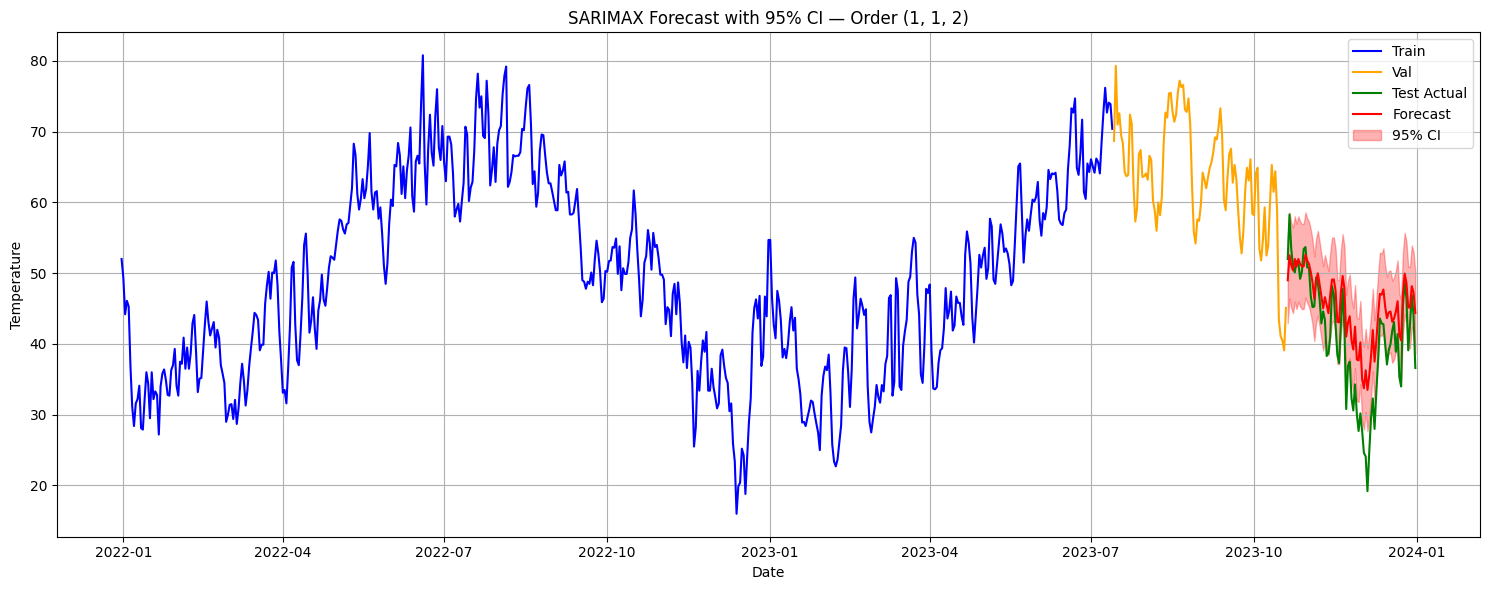

Warszawa model selection:   0%|                                                                 | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Warszawa model selection:   7%|████▏                                                    | 2/27 [00:00<00:04,  5.15it/s]

1
Order: (0, 0, 0), AICc: 4132.61, ADF p-value: 0.0001, Best_Order: (0, 0, 0), Best_aicc: 4132.61
(0, 0, 1)
2
1
Order: (0, 0, 1), AICc: 3835.36, ADF p-value: 0.0006, Best_Order: (0, 0, 1), Best_aicc: 3835.36
(0, 0, 2)
2


Warszawa model selection:  11%|██████▎                                                  | 3/27 [00:00<00:05,  4.01it/s]

1
Order: (0, 0, 2), AICc: 3746.31, ADF p-value: 0.0005, Best_Order: (0, 0, 2), Best_aicc: 3746.31
(0, 1, 0)
2


Warszawa model selection:  15%|████████▍                                                | 4/27 [00:00<00:05,  4.12it/s]

1
Order: (0, 1, 0), AICc: 3517.48, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3517.48
(0, 1, 1)
2


Warszawa model selection:  19%|██████████▌                                              | 5/27 [00:01<00:05,  3.92it/s]

1
Order: (0, 1, 1), AICc: 3477.49, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3477.49
(0, 1, 2)
2


Warszawa model selection:  22%|████████████▋                                            | 6/27 [00:01<00:06,  3.49it/s]

1
Order: (0, 1, 2), AICc: 3432.18, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(0, 2, 0)
2


Warszawa model selection:  26%|██████████████▊                                          | 7/27 [00:01<00:05,  3.59it/s]

1
Order: (0, 2, 0), AICc: 4066.43, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(0, 2, 1)
2


Warszawa model selection:  30%|████████████████▉                                        | 8/27 [00:02<00:06,  2.92it/s]

1
Order: (0, 2, 1), AICc: 3517.90, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(0, 2, 2)
2


Warszawa model selection:  33%|███████████████████                                      | 9/27 [00:02<00:07,  2.47it/s]

1
Order: (0, 2, 2), AICc: 3476.74, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(1, 0, 0)
2


Warszawa model selection:  37%|████████████████████▋                                   | 10/27 [00:03<00:06,  2.70it/s]

1
Order: (1, 0, 0), AICc: 3524.76, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(1, 0, 1)
2


Warszawa model selection:  41%|██████████████████████▊                                 | 11/27 [00:03<00:06,  2.51it/s]

1
Order: (1, 0, 1), AICc: 3483.21, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(1, 0, 2)
2


Warszawa model selection:  48%|██████████████████████████▉                             | 13/27 [00:04<00:05,  2.74it/s]

1
Order: (1, 0, 2), AICc: 3438.62, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(1, 1, 0)
2
1
Order: (1, 1, 0), AICc: 3498.55, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3432.18
(1, 1, 1)
2


Warszawa model selection:  52%|█████████████████████████████                           | 14/27 [00:04<00:04,  2.76it/s]

1
Order: (1, 1, 1), AICc: 3427.90, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 3427.90
(1, 1, 2)
2


Warszawa model selection:  56%|███████████████████████████████                         | 15/27 [00:05<00:04,  2.63it/s]

1
Order: (1, 1, 2), AICc: 3424.72, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(1, 2, 0)
2
1


Warszawa model selection:  59%|█████████████████████████████████▏                      | 16/27 [00:05<00:03,  3.08it/s]

Order: (1, 2, 0), AICc: 3880.75, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(1, 2, 1)
2


Warszawa model selection:  63%|███████████████████████████████████▎                    | 17/27 [00:05<00:03,  2.60it/s]

1
Order: (1, 2, 1), AICc: 3497.23, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(1, 2, 2)
2


Warszawa model selection:  67%|█████████████████████████████████████▎                  | 18/27 [00:06<00:04,  2.03it/s]

1
Order: (1, 2, 2), AICc: 3471.32, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(2, 0, 0)
2


Warszawa model selection:  70%|███████████████████████████████████████▍                | 19/27 [00:07<00:03,  2.07it/s]

1
Order: (2, 0, 0), AICc: 3499.07, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(2, 0, 1)
2


Warszawa model selection:  74%|█████████████████████████████████████████▍              | 20/27 [00:07<00:03,  2.01it/s]

1
Order: (2, 0, 1), AICc: 3435.06, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(2, 0, 2)
2


Warszawa model selection:  78%|███████████████████████████████████████████▌            | 21/27 [00:08<00:03,  1.88it/s]

1
Order: (2, 0, 2), AICc: 3442.28, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(2, 1, 0)
2


Warszawa model selection:  81%|█████████████████████████████████████████████▋          | 22/27 [00:08<00:02,  2.26it/s]

1
Order: (2, 1, 0), AICc: 3470.00, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(2, 1, 1)
2


Warszawa model selection:  85%|███████████████████████████████████████████████▋        | 23/27 [00:08<00:01,  2.28it/s]

1
Order: (2, 1, 1), AICc: 3429.72, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3424.72
(2, 1, 2)
2


Warszawa model selection:  89%|█████████████████████████████████████████████████▊      | 24/27 [00:09<00:01,  2.13it/s]

1
Order: (2, 1, 2), AICc: 3424.27, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3424.27
(2, 2, 0)
2


Warszawa model selection:  93%|███████████████████████████████████████████████████▊    | 25/27 [00:09<00:00,  2.51it/s]

1
Order: (2, 2, 0), AICc: 3749.22, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3424.27
(2, 2, 1)
2


Warszawa model selection:  96%|█████████████████████████████████████████████████████▉  | 26/27 [00:10<00:00,  2.19it/s]

1
Order: (2, 2, 1), AICc: 3474.27, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3424.27
(2, 2, 2)
2


Warszawa model selection: 100%|████████████████████████████████████████████████████████| 27/27 [00:11<00:00,  2.44it/s]


1
Order: (2, 2, 2), AICc: 3443.71, ADF p-value: 0.0000, Best_Order: (2, 1, 2), Best_aicc: 3424.27


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:35,  2.04it/s]

46.821069225850565
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:01<00:40,  1.76it/s]

50.687773161715086
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:01<00:35,  1.97it/s]

52.184781833692234
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:02<00:36,  1.88it/s]

52.33187437636305
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:02<00:34,  1.95it/s]

50.22031714864876
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:03<00:36,  1.82it/s]

51.47298971337308
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:03<00:38,  1.73it/s]

50.584333247894406
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:04<00:37,  1.72it/s]

51.531237662875014
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:05<00:37,  1.72it/s]

48.35283503525923
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:05<00:34,  1.81it/s]

50.8231913656234
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:06<00:34,  1.80it/s]

52.795969927190626
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:06<00:32,  1.85it/s]

52.60844401705262
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:07<00:33,  1.80it/s]

48.038094835866474
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:07<00:32,  1.82it/s]

47.9149661452117
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:08<00:31,  1.84it/s]

50.35682268059995
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:08<00:30,  1.84it/s]

48.06192443816771
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:09<00:31,  1.80it/s]

47.80198805616523
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:09<00:31,  1.74it/s]

50.377542945109
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:10<00:29,  1.83it/s]

48.1062649930045
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:10<00:27,  1.90it/s]

47.68916216273482
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:11<00:26,  1.98it/s]

46.809490583939876
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:12<00:27,  1.86it/s]

47.282053067007226
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:12<00:26,  1.85it/s]

48.11019670391504
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:13<00:27,  1.80it/s]

45.60974249880543
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:13<00:26,  1.81it/s]

45.11835084880572
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:14<00:26,  1.77it/s]

48.764964464667656
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:14<00:26,  1.75it/s]

48.3480409360308
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:15<00:25,  1.73it/s]

42.35721770348719
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:16<00:24,  1.76it/s]

42.91240877713044
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:16<00:24,  1.73it/s]

39.99562467888545
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:17<00:25,  1.67it/s]

40.79568458935276
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:17<00:25,  1.62it/s]

41.05507556330633
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:18<00:24,  1.62it/s]

38.565262395078065
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:19<00:24,  1.59it/s]

35.85114564862623
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:19<00:22,  1.69it/s]

42.80283695005946
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:20<00:22,  1.65it/s]

43.19136909051876
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:20<00:20,  1.71it/s]

42.028631552756174
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:21<00:21,  1.66it/s]

39.862868130405175
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:22<00:20,  1.65it/s]

40.17253187111105
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:22<00:19,  1.73it/s]

37.73659180541854
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:23<00:19,  1.67it/s]

36.197727954228995
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:23<00:18,  1.66it/s]

37.49641609222998
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:24<00:18,  1.62it/s]

33.89044465582461
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:25<00:17,  1.63it/s]

35.37136292692365
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:25<00:17,  1.60it/s]

37.3994050059425
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:26<00:16,  1.62it/s]

36.690002015108654
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:27<00:16,  1.61it/s]

34.611891339520895
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:27<00:15,  1.61it/s]

36.75770357700703
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:28<00:14,  1.60it/s]

38.31363742662252
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:28<00:14,  1.56it/s]

36.23287649824114
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:29<00:13,  1.57it/s]

36.9766864363922
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:30<00:13,  1.57it/s]

39.770453380762355
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:30<00:12,  1.60it/s]

44.22975597266849
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:31<00:11,  1.64it/s]

43.472436072541356
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:32<00:11,  1.59it/s]

41.88065530699804
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:32<00:10,  1.57it/s]

41.62159209658565
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:33<00:10,  1.57it/s]

42.22356388029505
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:33<00:09,  1.63it/s]

44.28822709207622
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:34<00:08,  1.64it/s]

46.68435346016454
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:35<00:07,  1.67it/s]

46.78740780002332
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:35<00:07,  1.70it/s]

46.34622359434884
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:36<00:06,  1.71it/s]

46.51023535554077
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:36<00:06,  1.63it/s]

45.66363432623487
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:37<00:05,  1.59it/s]

41.466159552473286
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:38<00:05,  1.56it/s]

39.83857804991645
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:38<00:04,  1.54it/s]

42.55665701951628
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:39<00:03,  1.56it/s]

47.20197101755791
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:40<00:03,  1.55it/s]

47.36750549220996
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:40<00:02,  1.57it/s]

42.860908068939835
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:41<00:01,  1.53it/s]

43.18316251521779
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:42<00:01,  1.61it/s]

45.718376156288656
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:42<00:00,  1.54it/s]

45.86117832245943
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:43<00:00,  1.68it/s]

44.09246732174286
False
False


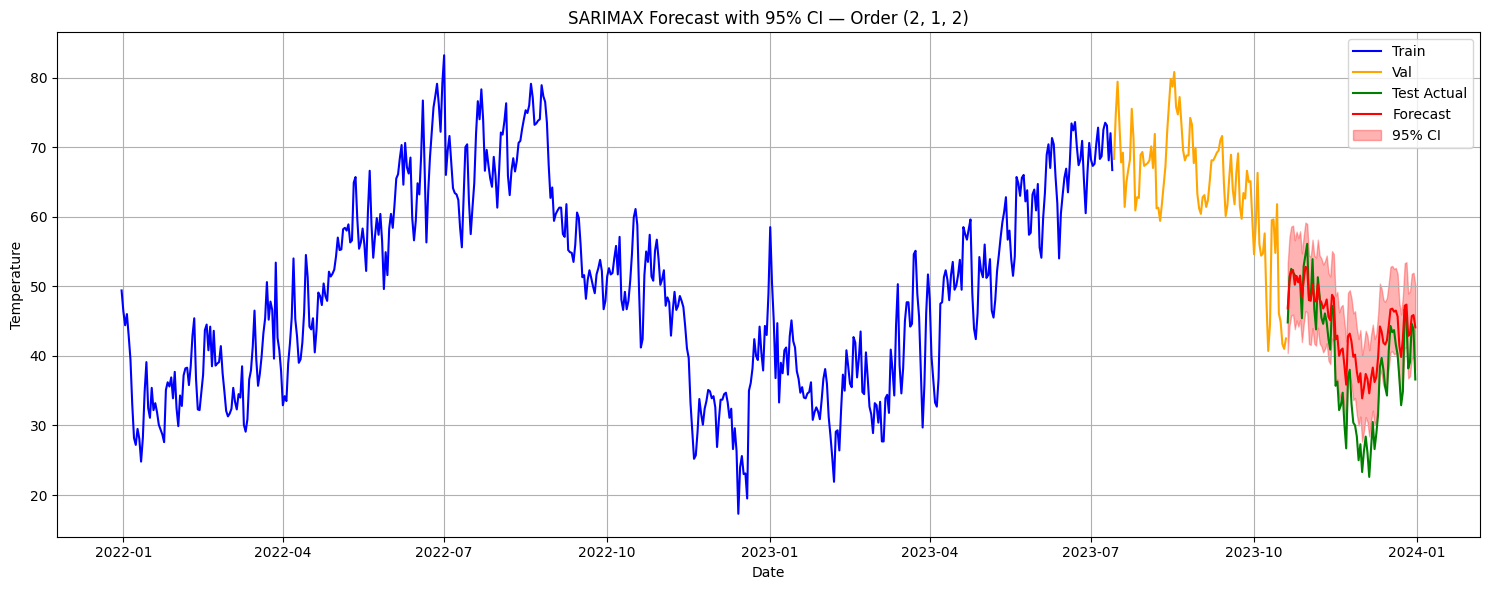

Wiedeń model selection:   0%|                                                                   | 0/27 [00:00<?, ?it/s]

(0, 0, 0)
2


Wiedeń model selection:   4%|██▏                                                        | 1/27 [00:00<00:07,  3.52it/s]

1
Order: (0, 0, 0), AICc: 3903.44, ADF p-value: 0.0000, Best_Order: (0, 0, 0), Best_aicc: 3903.44
(0, 0, 1)
2


Wiedeń model selection:   7%|████▎                                                      | 2/27 [00:00<00:07,  3.35it/s]

1
Order: (0, 0, 1), AICc: 3665.69, ADF p-value: 0.0000, Best_Order: (0, 0, 1), Best_aicc: 3665.69
(0, 0, 2)
2


Wiedeń model selection:  11%|██████▌                                                    | 3/27 [00:00<00:06,  3.60it/s]

1
Order: (0, 0, 2), AICc: 3574.13, ADF p-value: 0.0000, Best_Order: (0, 0, 2), Best_aicc: 3574.13
(0, 1, 0)
2


Wiedeń model selection:  15%|████████▋                                                  | 4/27 [00:01<00:05,  3.85it/s]

1
Order: (0, 1, 0), AICc: 3364.85, ADF p-value: 0.0000, Best_Order: (0, 1, 0), Best_aicc: 3364.85
(0, 1, 1)
2
1


Wiedeń model selection:  19%|██████████▉                                                | 5/27 [00:01<00:05,  4.14it/s]

Order: (0, 1, 1), AICc: 3326.69, ADF p-value: 0.0000, Best_Order: (0, 1, 1), Best_aicc: 3326.69
(0, 1, 2)
2


Wiedeń model selection:  22%|█████████████                                              | 6/27 [00:01<00:05,  3.91it/s]

1
Order: (0, 1, 2), AICc: 3281.35, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(0, 2, 0)
2


Wiedeń model selection:  26%|███████████████▎                                           | 7/27 [00:01<00:04,  4.07it/s]

1
Order: (0, 2, 0), AICc: 3879.09, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(0, 2, 1)
2


Wiedeń model selection:  30%|█████████████████▍                                         | 8/27 [00:02<00:05,  3.66it/s]

1
Order: (0, 2, 1), AICc: 3360.08, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(0, 2, 2)
2


Wiedeń model selection:  33%|███████████████████▋                                       | 9/27 [00:02<00:05,  3.44it/s]

1
Order: (0, 2, 2), AICc: 3325.23, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(1, 0, 0)
2


Wiedeń model selection:  37%|█████████████████████▍                                    | 10/27 [00:02<00:04,  3.47it/s]

1
Order: (1, 0, 0), AICc: 3369.36, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(1, 0, 1)
2


Wiedeń model selection:  41%|███████████████████████▋                                  | 11/27 [00:03<00:05,  2.90it/s]

1
Order: (1, 0, 1), AICc: 3332.45, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(1, 0, 2)
2


Wiedeń model selection:  44%|█████████████████████████▊                                | 12/27 [00:03<00:06,  2.33it/s]

1
Order: (1, 0, 2), AICc: 3289.46, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(1, 1, 0)
2


Wiedeń model selection:  48%|███████████████████████████▉                              | 13/27 [00:04<00:05,  2.75it/s]

1
Order: (1, 1, 0), AICc: 3350.85, ADF p-value: 0.0000, Best_Order: (0, 1, 2), Best_aicc: 3281.35
(1, 1, 1)
2


Wiedeń model selection:  52%|██████████████████████████████                            | 14/27 [00:04<00:04,  2.67it/s]

1
Order: (1, 1, 1), AICc: 3278.62, ADF p-value: 0.0000, Best_Order: (1, 1, 1), Best_aicc: 3278.62
(1, 1, 2)
2


Wiedeń model selection:  56%|████████████████████████████████▏                         | 15/27 [00:04<00:04,  2.65it/s]

1
Order: (1, 1, 2), AICc: 3272.46, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(1, 2, 0)
2


Wiedeń model selection:  59%|██████████████████████████████████▎                       | 16/27 [00:05<00:03,  2.93it/s]

1
Order: (1, 2, 0), AICc: 3730.18, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(1, 2, 1)
2


Wiedeń model selection:  63%|████████████████████████████████████▌                     | 17/27 [00:05<00:03,  2.59it/s]

1
Order: (1, 2, 1), AICc: 3347.19, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(1, 2, 2)
2


Wiedeń model selection:  67%|██████████████████████████████████████▋                   | 18/27 [00:06<00:04,  1.93it/s]

1
Order: (1, 2, 2), AICc: 3280.75, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 0, 0)
2


Wiedeń model selection:  70%|████████████████████████████████████████▊                 | 19/27 [00:06<00:03,  2.03it/s]

1
Order: (2, 0, 0), AICc: 3351.08, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 0, 1)
2


Wiedeń model selection:  74%|██████████████████████████████████████████▉               | 20/27 [00:07<00:03,  1.97it/s]

1
Order: (2, 0, 1), AICc: 3285.47, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 0, 2)
2


Wiedeń model selection:  78%|█████████████████████████████████████████████             | 21/27 [00:08<00:03,  1.78it/s]

1
Order: (2, 0, 2), AICc: 3281.86, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 1, 0)
2


Wiedeń model selection:  81%|███████████████████████████████████████████████▎          | 22/27 [00:08<00:02,  2.16it/s]

1
Order: (2, 1, 0), AICc: 3315.59, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 1, 1)
2


Wiedeń model selection:  85%|█████████████████████████████████████████████████▍        | 23/27 [00:08<00:01,  2.34it/s]

1
Order: (2, 1, 1), AICc: 3280.16, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 1, 2)
2


Wiedeń model selection:  89%|███████████████████████████████████████████████████▌      | 24/27 [00:09<00:01,  2.04it/s]

1
Order: (2, 1, 2), AICc: 3274.09, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 2, 0)
2


Wiedeń model selection:  93%|█████████████████████████████████████████████████████▋    | 25/27 [00:09<00:00,  2.26it/s]

1
Order: (2, 2, 0), AICc: 3620.57, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 2, 1)
2


Wiedeń model selection:  96%|███████████████████████████████████████████████████████▊  | 26/27 [00:10<00:00,  2.26it/s]

1
Order: (2, 2, 1), AICc: 3320.09, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46
(2, 2, 2)
2


Wiedeń model selection: 100%|██████████████████████████████████████████████████████████| 27/27 [00:10<00:00,  2.47it/s]


1
Order: (2, 2, 2), AICc: 3289.88, ADF p-value: 0.0000, Best_Order: (1, 1, 2), Best_aicc: 3272.46


Analysed test_samples from:   0%|                                                               | 0/73 [00:00<?, ?it/s]

1


Analysed test_samples from:   1%|▊                                                      | 1/73 [00:00<00:25,  2.86it/s]

57.8449434787823
1


Analysed test_samples from:   3%|█▌                                                     | 2/73 [00:00<00:27,  2.59it/s]

62.683339461989114
1


Analysed test_samples from:   4%|██▎                                                    | 3/73 [00:01<00:31,  2.19it/s]

59.37077225819115
1


Analysed test_samples from:   5%|███                                                    | 4/73 [00:01<00:30,  2.27it/s]

57.74631227123143
1


Analysed test_samples from:   7%|███▊                                                   | 5/73 [00:02<00:28,  2.42it/s]

56.33440335380239
1


Analysed test_samples from:   8%|████▌                                                  | 6/73 [00:02<00:26,  2.50it/s]

59.857299010301865
1


Analysed test_samples from:  10%|█████▎                                                 | 7/73 [00:02<00:27,  2.44it/s]

59.6887483008113
1


Analysed test_samples from:  11%|██████                                                 | 8/73 [00:03<00:27,  2.40it/s]

57.03954861785948
1


Analysed test_samples from:  12%|██████▊                                                | 9/73 [00:03<00:27,  2.34it/s]

57.13819755294368
1


Analysed test_samples from:  14%|███████▍                                              | 10/73 [00:04<00:26,  2.38it/s]

56.05899567526647
1


Analysed test_samples from:  15%|████████▏                                             | 11/73 [00:04<00:26,  2.33it/s]

55.76440588514446
1


Analysed test_samples from:  16%|████████▉                                             | 12/73 [00:05<00:26,  2.30it/s]

56.43013013328056
1


Analysed test_samples from:  18%|█████████▌                                            | 13/73 [00:05<00:26,  2.25it/s]

57.124519123091474
1


Analysed test_samples from:  19%|██████████▎                                           | 14/73 [00:05<00:25,  2.31it/s]

57.14801958011789
1


Analysed test_samples from:  21%|███████████                                           | 15/73 [00:06<00:24,  2.35it/s]

51.9351261623211
1


Analysed test_samples from:  22%|███████████▊                                          | 16/73 [00:06<00:23,  2.46it/s]

54.57032860227861
1


Analysed test_samples from:  23%|████████████▌                                         | 17/73 [00:07<00:22,  2.49it/s]

55.3991129310446
1


Analysed test_samples from:  25%|█████████████▎                                        | 18/73 [00:07<00:22,  2.43it/s]

55.88986234021294
1


Analysed test_samples from:  26%|██████████████                                        | 19/73 [00:07<00:22,  2.42it/s]

55.74093893652491
1


Analysed test_samples from:  27%|██████████████▊                                       | 20/73 [00:08<00:21,  2.42it/s]

53.059578050800454
1


Analysed test_samples from:  29%|███████████████▌                                      | 21/73 [00:08<00:21,  2.47it/s]

50.26464816993388
1


Analysed test_samples from:  30%|████████████████▎                                     | 22/73 [00:09<00:20,  2.52it/s]

51.2548956655222
1


Analysed test_samples from:  32%|█████████████████                                     | 23/73 [00:09<00:19,  2.53it/s]

52.054519492912995
1


Analysed test_samples from:  33%|█████████████████▊                                    | 24/73 [00:09<00:19,  2.48it/s]

50.928670588228
1


Analysed test_samples from:  34%|██████████████████▍                                   | 25/73 [00:10<00:19,  2.42it/s]

49.84766431215074
1


Analysed test_samples from:  36%|███████████████████▏                                  | 26/73 [00:10<00:18,  2.48it/s]

56.75859612369776
1


Analysed test_samples from:  37%|███████████████████▉                                  | 27/73 [00:11<00:18,  2.43it/s]

55.264319793396794
1


Analysed test_samples from:  38%|████████████████████▋                                 | 28/73 [00:11<00:18,  2.43it/s]

54.210523093821294
1


Analysed test_samples from:  40%|█████████████████████▍                                | 29/73 [00:12<00:18,  2.44it/s]

49.359766857082334
1


Analysed test_samples from:  41%|██████████████████████▏                               | 30/73 [00:12<00:17,  2.42it/s]

48.85940792257731
1


Analysed test_samples from:  42%|██████████████████████▉                               | 31/73 [00:12<00:17,  2.42it/s]

46.72366396670721
1


Analysed test_samples from:  44%|███████████████████████▋                              | 32/73 [00:13<00:17,  2.40it/s]

54.393783452209746
1


Analysed test_samples from:  45%|████████████████████████▍                             | 33/73 [00:13<00:16,  2.42it/s]

52.740114124020806
1


Analysed test_samples from:  47%|█████████████████████████▏                            | 34/73 [00:14<00:16,  2.42it/s]

45.756286240857804
1


Analysed test_samples from:  48%|█████████████████████████▉                            | 35/73 [00:14<00:15,  2.44it/s]

46.909222072419226
1


Analysed test_samples from:  49%|██████████████████████████▋                           | 36/73 [00:14<00:15,  2.45it/s]

49.347706712951805
1


Analysed test_samples from:  51%|███████████████████████████▎                          | 37/73 [00:15<00:14,  2.44it/s]

44.11684142456111
1


Analysed test_samples from:  52%|████████████████████████████                          | 38/73 [00:15<00:14,  2.48it/s]

44.49814772830541
1


Analysed test_samples from:  53%|████████████████████████████▊                         | 39/73 [00:16<00:13,  2.50it/s]

48.024888826862636
1


Analysed test_samples from:  55%|█████████████████████████████▌                        | 40/73 [00:16<00:13,  2.41it/s]

44.924229242657
1


Analysed test_samples from:  56%|██████████████████████████████▎                       | 41/73 [00:16<00:13,  2.46it/s]

41.50723892255159
1


Analysed test_samples from:  58%|███████████████████████████████                       | 42/73 [00:17<00:13,  2.35it/s]

41.64491860788039
1


Analysed test_samples from:  59%|███████████████████████████████▊                      | 43/73 [00:17<00:12,  2.38it/s]

41.722504603576965
1


Analysed test_samples from:  60%|████████████████████████████████▌                     | 44/73 [00:18<00:12,  2.31it/s]

40.34241618016443
1


Analysed test_samples from:  62%|█████████████████████████████████▎                    | 45/73 [00:18<00:12,  2.32it/s]

40.108723593561294
1


Analysed test_samples from:  63%|██████████████████████████████████                    | 46/73 [00:19<00:12,  2.22it/s]

36.81154899469463
1


Analysed test_samples from:  64%|██████████████████████████████████▊                   | 47/73 [00:19<00:11,  2.30it/s]

39.65189657134642
1


Analysed test_samples from:  66%|███████████████████████████████████▌                  | 48/73 [00:20<00:11,  2.25it/s]

41.514490074811846
1


Analysed test_samples from:  67%|████████████████████████████████████▏                 | 49/73 [00:20<00:10,  2.26it/s]

43.89157527070361
1


Analysed test_samples from:  68%|████████████████████████████████████▉                 | 50/73 [00:20<00:09,  2.33it/s]

40.91405640738739
1


Analysed test_samples from:  70%|█████████████████████████████████████▋                | 51/73 [00:21<00:09,  2.38it/s]

41.317910338500816
1


Analysed test_samples from:  71%|██████████████████████████████████████▍               | 52/73 [00:21<00:08,  2.43it/s]

45.459669397172355
1


Analysed test_samples from:  73%|███████████████████████████████████████▏              | 53/73 [00:22<00:08,  2.34it/s]

45.323642911167845
1


Analysed test_samples from:  74%|███████████████████████████████████████▉              | 54/73 [00:22<00:08,  2.27it/s]

51.51232115170022
1


Analysed test_samples from:  75%|████████████████████████████████████████▋             | 55/73 [00:23<00:07,  2.31it/s]

47.18462437502026
1


Analysed test_samples from:  77%|█████████████████████████████████████████▍            | 56/73 [00:23<00:07,  2.33it/s]

50.60343242112565
1


Analysed test_samples from:  78%|██████████████████████████████████████████▏           | 57/73 [00:23<00:06,  2.32it/s]

45.888393916654735
1


Analysed test_samples from:  79%|██████████████████████████████████████████▉           | 58/73 [00:24<00:06,  2.41it/s]

47.92214152198338
1


Analysed test_samples from:  81%|███████████████████████████████████████████▋          | 59/73 [00:24<00:05,  2.49it/s]

47.751770770057306
1


Analysed test_samples from:  82%|████████████████████████████████████████████▍         | 60/73 [00:25<00:05,  2.50it/s]

46.32962527958186
1


Analysed test_samples from:  84%|█████████████████████████████████████████████         | 61/73 [00:25<00:04,  2.54it/s]

43.98838789761642
1


Analysed test_samples from:  85%|█████████████████████████████████████████████▊        | 62/73 [00:25<00:04,  2.50it/s]

48.91626304222482
1


Analysed test_samples from:  86%|██████████████████████████████████████████████▌       | 63/73 [00:26<00:04,  2.45it/s]

51.58605600394259
1


Analysed test_samples from:  88%|███████████████████████████████████████████████▎      | 64/73 [00:26<00:03,  2.44it/s]

47.250393324562516
1


Analysed test_samples from:  89%|████████████████████████████████████████████████      | 65/73 [00:27<00:03,  2.40it/s]

44.608468489510656
1


Analysed test_samples from:  90%|████████████████████████████████████████████████▊     | 66/73 [00:27<00:02,  2.41it/s]

53.646549233053356
1


Analysed test_samples from:  92%|█████████████████████████████████████████████████▌    | 67/73 [00:27<00:02,  2.38it/s]

54.23209794326293
1


Analysed test_samples from:  93%|██████████████████████████████████████████████████▎   | 68/73 [00:28<00:02,  2.32it/s]

52.1021871201871
1


Analysed test_samples from:  95%|███████████████████████████████████████████████████   | 69/73 [00:28<00:01,  2.24it/s]

51.92919123252516
1


Analysed test_samples from:  96%|███████████████████████████████████████████████████▊  | 70/73 [00:29<00:01,  2.20it/s]

45.45830805967085
1


Analysed test_samples from:  97%|████████████████████████████████████████████████████▌ | 71/73 [00:29<00:00,  2.36it/s]

51.636680625342834
1


Analysed test_samples from:  99%|█████████████████████████████████████████████████████▎| 72/73 [00:30<00:00,  2.41it/s]

53.11865939860117
1


Analysed test_samples from: 100%|██████████████████████████████████████████████████████| 73/73 [00:30<00:00,  2.40it/s]

44.4414412699819
False
False


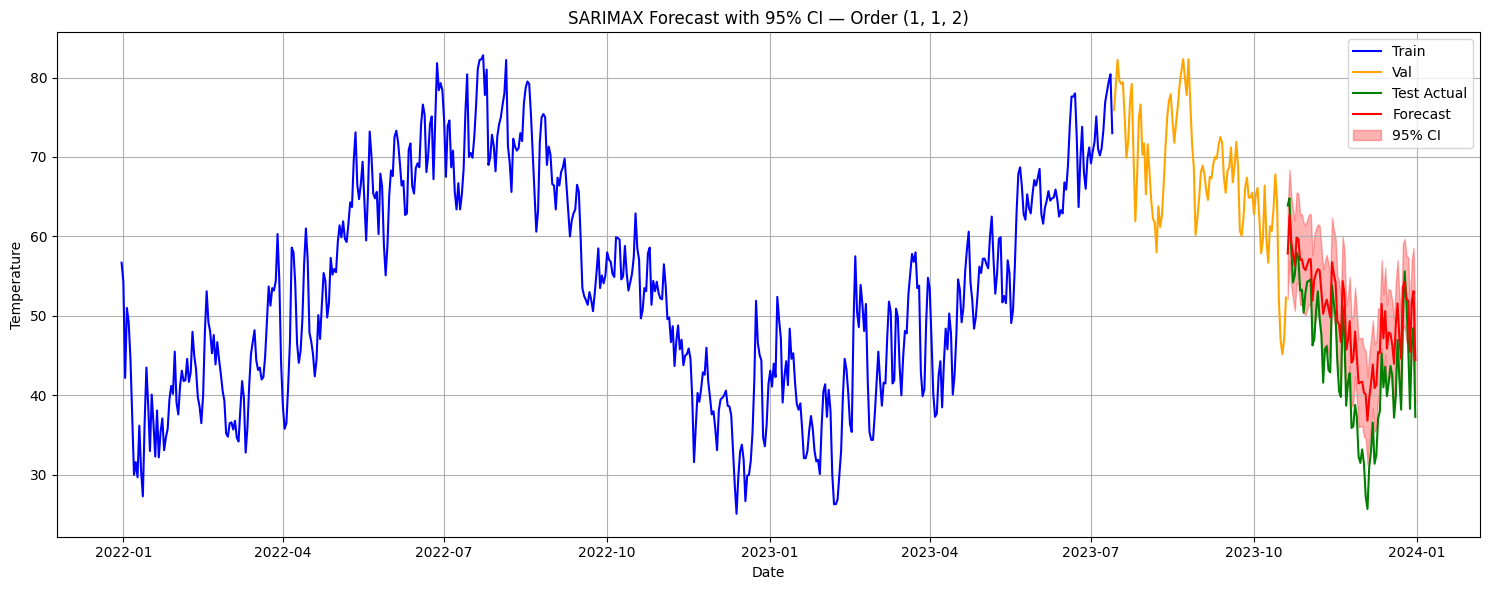

In [10]:
seasonal_order = (1, 1, 1, 365)
# plot_path = f"plots/{city}__sarimax_plot.png"
forecast_results = []
for city, df in city_dataframes.items():
    plot_path = f"../../plots/{city}__sarimax_plot.png"
    data = df.copy()

    # Filtrujemy tylko ostatnie 2 lata danych
    data.reset_index(inplace=True)
    data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')
    data['Month'] = data['DATE'].dt.month
    data.set_index('DATE', inplace=True)
    
    last_date = data.index.max()
    cutoff_date = last_date - pd.DateOffset(years=last_n_years)
    data = data[data.index >= cutoff_date]

    data[exog_vars + ['TEMP']] = data[exog_vars + ['TEMP']].apply(pd.to_numeric, errors='coerce')
    data = data.dropna(subset=['TEMP'] + exog_vars)


    n_total = len(data)
    n_test = int(test_size_ratio * n_total)
    n_val = int(validation_size_ratio * (n_total - n_test))
    n_train = n_total - n_val - n_test

    train = data.iloc[:n_train]
    val = data.iloc[n_train:n_train + n_val]
    test = data.iloc[n_train + n_val:]


    combined_train = pd.concat([train, val])
    best_aicc = np.inf
    best_order = (0, 0, 0)
    # p = d = q = range(3)
    # candidate_orders = list(product(p, d, q))


    candidate_orders = list(product(range(3), repeat=3))  # or range(5)
    for order in tqdm(candidate_orders, desc=f"{city} model selection"):
        print(order)
        try:
            
            model = SARIMAX(combined_train['TEMP'], exog=combined_train[exog_vars], order=order, #seasonal_order=(1,1,1,365),
                            enforce_stationarity=False, enforce_invertibility=False)
            print('2')
            res = model.fit(disp=True)
            print('1')
            aicc = res.aic + (2 * len(res.params)**2 + 2 * len(res.params)) / (len(train) - len(res.params) - 1)
            residuals = res.resid
            # print('1')
            adf_result = adfuller(residuals.dropna())
            # print('1')
            p_value = adf_result[1]
            if p_value < 0.05 and aicc < best_aicc:
                best_aicc = aicc
                best_order = order
            print(f"Order: {order}, AICc: {aicc:.2f}, ADF p-value: {p_value:.4f}, Best_Order: {best_order}, Best_aicc: {best_aicc:.2f}")
        except:
            continue


    # Rolling forecast: iteracyjne prognozowanie 1 kroku do przodu
    history_y = combined_train['TEMP'].tolist()
    history_exog = combined_train[exog_vars].copy()
    predictions, lowers, uppers, actuals = [], [], [], []

    for t in tqdm(range(len(test)), desc=f"Analysed test_samples from: "):
        try:
            print('1')
            model = SARIMAX(history_y, exog=history_exog, order=best_order, #seasonal_order=(1,1,1,365),
                            enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)

            next_exog = test[exog_vars].iloc[[t]]
            pred = model_fit.get_forecast(steps=1, exog=next_exog)
            pred_mean = pred.predicted_mean.iloc[0]
            ci = pred.conf_int(alpha=0.05).iloc[0]
            print(pred_mean)
            predictions.append(pred_mean)
            lowers.append(ci[0])
            uppers.append(ci[1])
            actuals.append(test['TEMP'].iloc[t])
            if not np.isnan(pred_mean):
                history_y.append(pred_mean)
                history_exog = pd.concat([history_exog, next_exog])
            else:
                print(f"⚠️ Skipped step {t} due to NaN prediction.")
            continue
            # history_y.append(pred_mean)  
            # history_exog = pd.concat([history_exog, next_exog])
        except:
            predictions.append(np.nan)
            lowers.append(np.nan)
            uppers.append(np.nan)
            actuals.append(test['TEMP'].iloc[t])



    # Ewaluacja
    y_true = np.array(actuals)
    y_pred = np.array(predictions)

    print(np.isnan(y_true).any())
    print(np.isnan(y_pred).any())

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    forecast_results.append({
        'City': city,
        'Best Order': best_order,
        'Test MAE': mae,
        'Test RMSE': rmse,
        'AICc': best_aicc
    })

    
    # Wykres
    plt.figure(figsize=(15, 6))
    plt.plot(data.index[:n_train], data['TEMP'].iloc[:n_train], label='Train', color='blue')
    plt.plot(data.index[n_train:n_train+n_val], data['TEMP'].iloc[n_train:n_train+n_val], label='Val', color='orange')
    plt.plot(data.index[n_train+n_val:], actuals, label='Test Actual', color='green')
    plt.plot(data.index[n_train+n_val:], predictions, label='Forecast', color='red')
    plt.fill_between(data.index[n_train+n_val:], lowers, uppers, color='red', alpha=0.3, label='95% CI')
    plt.title(f"SARIMAX Forecast with 95% CI — Order {best_order}")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.show()

In [11]:
from pmdarima import auto_arima

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def create_lag_features(df, lags, target_col='TEMP'):
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    return df

# Config
lags = [1, 2, 3,7]  # example lags
exog_vars = ['DEWP', 'Month', 'PRCP', 'VISIB']
all_features = [f'TEMP_lag{l}' for l in lags] + exog_vars

forecast_results = []

for city, df in city_dataframes.items():
    data = df.copy()
    data.reset_index(inplace=True)
    data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')
    data['Month'] = data['DATE'].dt.month
    data.set_index('DATE', inplace=True)
    
    # Filter last 2 years
    cutoff_date = data.index.max() - pd.DateOffset(years=2)
    data = data[data.index >= cutoff_date]
    
    data[exog_vars + ['TEMP']] = data[exog_vars + ['TEMP']].apply(pd.to_numeric, errors='coerce')
    data = create_lag_features(data, lags)
    data.dropna(inplace=True)

    # Split
    n_total = len(data)
    n_test = int(0.1 * n_total)
    n_val = int(0.15 * (n_total - n_test))
    n_train = n_total - n_val - n_test

    train = data.iloc[:n_train]
    val = data.iloc[n_train:n_train + n_val]
    test = data.iloc[n_train + n_val:]

    combined = pd.concat([train, val])
    # predictions, actuals = [], []
    predictions, lowers, uppers, actuals = [], [], [], []

    for t in tqdm(range(len(test)), desc=f"Rolling RF for {city}"):
        try:
            # Define X and y for model training
            X_train = combined[all_features]
            y_train = combined['TEMP']
            
            # Fit model
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)

            # Prepare test sample
            x_next = test[all_features].iloc[[t]]
            y_next = test['TEMP'].iloc[t]
            # y_pred = model.predict(x_next)[0]
            all_preds = np.array([tree.predict(x_next)[0] for tree in model.estimators_])
            pred_mean = np.mean(all_preds)
            ci_lower = np.percentile(all_preds, 2.5)
            ci_upper = np.percentile(all_preds, 97.5)

            
            # predictions.append(y_pred)
            predictions.append(pred_mean)
            lowers.append(ci_lower)
            uppers.append(ci_upper)
            actuals.append(y_next)

            # Add row to combined history (simulate rolling)
            next_row = test.iloc[[t]].copy()
            next_row['TEMP'] = pred_mean  # use predicted value
            combined = pd.concat([combined, next_row])
        except Exception as e:
            print(f"{city} step {t} failed: {e}")
            predictions.append(np.nan)
            actuals.append(test['TEMP'].iloc[t])

    # Evaluation
    y_true = np.array(actuals)
    y_pred = np.array(predictions)
    mask = ~np.isnan(y_pred)

    if mask.sum() == 0:
        print(f"{city} — no valid predictions")
        continue

    mae = mean_absolute_error(y_true[mask], y_pred[mask])
    rmse = np.sqrt(mean_squared_error(y_true[mask], y_pred[mask]))

    forecast_results.append({
        'City': city,
        'Model': 'RandomForest',
        'Test MAE': mae,
        'Test RMSE': rmse
    })

    # Plot
    test_index = test.index[:len(y_pred)]
    plt.figure(figsize=(15, 6))
    plt.plot(data.index[:n_train], data['TEMP'].iloc[:n_train], label='Train', color='blue')
    plt.plot(data.index[n_train:n_train+n_val], data['TEMP'].iloc[n_train:n_train+n_val], label='Val', color='orange')
    plt.plot(test_index, y_true, label='Test Actual', color='green')
    plt.fill_between(test_index, lowers, uppers, color='red', alpha=0.3, label='95% CI')
    plt.plot(test_index, y_pred, label='Forecast (RF)', color='red')
    plt.title(f"Random Forest Rolling Forecast — {city}")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"../../plots/{city}_randomforest.png")
    plt.close()


Rolling RF for Wiedeń: 100%|███████████████████████████████████████████████████████████| 72/72 [00:26<00:00,  2.76it/s]


In [13]:
forecast_results

[{'City': 'Ateny',
  'Model': 'RandomForest',
  'Test MAE': 2.5913532538431117,
  'Test RMSE': 3.3110576437363473},
 {'City': 'Berlin',
  'Model': 'RandomForest',
  'Test MAE': 2.213854448364975,
  'Test RMSE': 2.763150691958107},
 {'City': 'Bruksela',
  'Model': 'RandomForest',
  'Test MAE': 2.104675499193953,
  'Test RMSE': 2.5358631943032495},
 {'City': 'Budapeszt',
  'Model': 'RandomForest',
  'Test MAE': 2.975801361490591,
  'Test RMSE': 3.5485013812483865},
 {'City': 'Lisbona',
  'Model': 'RandomForest',
  'Test MAE': 1.8826458219314957,
  'Test RMSE': 2.5379073770421536},
 {'City': 'Londyn',
  'Model': 'RandomForest',
  'Test MAE': 1.613961442661724,
  'Test RMSE': 1.9668790687150095},
 {'City': 'Madryd',
  'Model': 'RandomForest',
  'Test MAE': 2.404226537265454,
  'Test RMSE': 2.965278670613778},
 {'City': 'Moskwa',
  'Model': 'RandomForest',
  'Test MAE': 3.6079551258404217,
  'Test RMSE': 4.908083692679886},
 {'City': 'Paryż',
  'Model': 'RandomForest',
  'Test MAE': 2.09800